# **Project Name**    - **Retail Sales Prediction**


##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -**  Pratik Kanjilal


# **GitHub Link -**

https://github.com/Pratik23-pk/retail_sales_prediction

# **Problem Statement**


### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [ ]:
# Load Dataset
rossmann_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter Datascience/Datasets/Rossmann Stores Data.csv')
store_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter Datascience/Datasets/store.csv')

<ipython-input-5-a61e097e5e04>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  rossmann_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter Datascience/Datasets/Rossmann Stores Data.csv')


### Dataset First View

In [ ]:
# Dataset First Look
rossmann_df.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [ ]:
# Dataset First Look
store_df.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
rossmann_df.shape

(1017209, 9)

We see here that the rossmann dataset consists of 1017209 values and 9 features

In [ ]:
store_df.shape

(1115, 10)

the store dataset consists of 1115 values and 10 features

### Dataset Information



#### <b>Rossmann Stores Data.csv </b> - historical data including Sales
#### <b>store.csv </b> - supplemental information about the stores




In [ ]:
# Dataset Info
rossmann_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


### Duplicate Values

In [ ]:
#rossmann_df Dataset Duplicate Value Count
len(rossmann_df[rossmann_df.duplicated()])

0

In [ ]:
# store_df Dataset Duplicate Value Count
len(store_df[store_df.duplicated()])

0

### Missing Values/Null Values

In [ ]:
rossmann_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
# Missing Values/Null Values Count
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

There are many Nan values in columns - **'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear, Promointerval', 'Promo2sinceWeek' and 'Promo2sinceYear'**. Also **CompetitionDistance** has only 3 null values. We have to clean this data. Let's start .....

<Axes: >

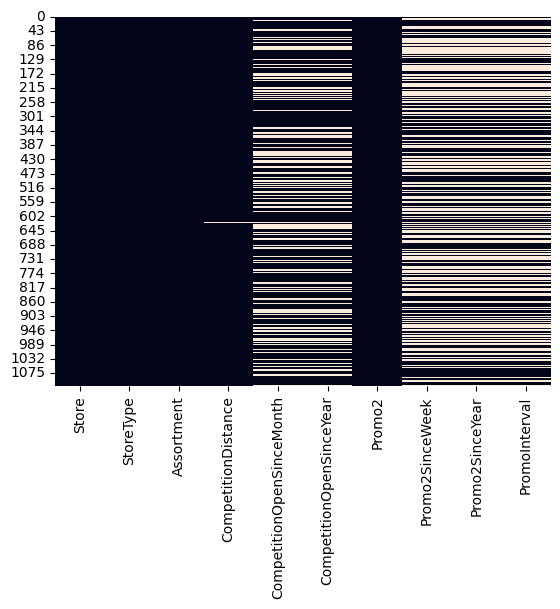

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(store_df.isnull(), cbar=False)

##### 1. CompetitionDistance

In [ ]:
store_df[pd.isnull(store_df.CompetitionDistance)]

Store StoreType Assortment  CompetitionDistance  \
290    291         d          a                  NaN   
621    622         a          c                  NaN   
878    879         d          a                  NaN   

     CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
290                        NaN                       NaN       0   
621                        NaN                       NaN       0   
878                        NaN                       NaN       1   

     Promo2SinceWeek  Promo2SinceYear    PromoInterval  
290              NaN              NaN              NaN  
621              NaN              NaN              NaN  
878              5.0           2013.0  Feb,May,Aug,Nov

So, we can fill these three values with many ways such as 0 or mean or mode or median. I decided to fill with it **Median**.

In [ ]:
## code for replacing Nan values in CompetitionDistance with median.
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)

##### 2. '**CompetitionOpenSinceMonth**', '**CompetitionOpenSinceYear**, **Promointerval**', '**Promo2sinceWeek**' and '**Promo2sinceYear**'

In [ ]:
## code for replacing Nan values with 0.

store_new = store_df.copy()

## Replacing Nan values with 0 in CompetitionOpenSinceMonth
store_new['CompetitionOpenSinceMonth'] = store_new['CompetitionOpenSinceMonth'].fillna(0)

## Replacing Nan values with 0 in CompetitionOpenSinceYear
store_new['CompetitionOpenSinceYear'] = store_new['CompetitionOpenSinceYear'].fillna(0)

## Replacing Nan values with 0 in Promo2SinceWeek
store_new['Promo2SinceWeek'] = store_new['Promo2SinceWeek'].fillna(0)

## Replacing Nan values with 0 in Promo2SinceYear
store_new['Promo2SinceYear'] = store_new['Promo2SinceYear'].fillna(0)

## Replacing Nan values with 0 in PromoInterval
store_new['PromoInterval'] = store_new['PromoInterval'].fillna(0)

## Now checking Nan values
store_new.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

### What did you know about your dataset?

There is not much information provided about these data. Also we observe from dataset that where the **Promo2** has value equals to zero there are **Nan values** for these columns. This means the store which do not want any promotion, are defined as **null values** in the  promointerval , promo2sinceweek and so on.So for this purpose the best way to fill those features is to assign value equals to **0**.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
rossmann_df.keys()

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
store_df.keys()

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
# generate density plots of all features in a dataframe
# prints density plots
import math
def density_plot_of_all_features(dataframe):
  columns = dataframe.describe().columns.tolist()

  columns_num = 3
  rows_num = math.ceil(len(columns)/columns_num)
  fig, axes = plt.subplots(rows_num, columns_num, figsize=(10*columns_num, 8*rows_num))

  row = -1
  column = columns_num - 1
  for feature in columns:
    if column == (columns_num - 1):
      row += 1
      column = 0
    else:
      column += 1
    sns.distplot(ax=axes[row, column], a=dataframe[feature])
    axes[row, column].set_title(f"{feature} Distribution")

  if len(columns) % columns_num != 0:
    for column_num in range(column + 1, columns_num):
      fig.delaxes(axes[rows_num - 1][column_num])

In [ ]:
# Dataset Describe
rossmann_df.describe()

Store     DayOfWeek         Sales     Customers          Open  \
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   
mean   5.584297e+02  3.998341e+00  5.773819e+03  6.331459e+02  8.301067e-01   
std    3.219087e+02  1.997391e+00  3.849926e+03  4.644117e+02  3.755392e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.800000e+02  2.000000e+00  3.727000e+03  4.050000e+02  1.000000e+00   
50%    5.580000e+02  4.000000e+00  5.744000e+03  6.090000e+02  1.000000e+00   
75%    8.380000e+02  6.000000e+00  7.856000e+03  8.370000e+02  1.000000e+00   
max    1.115000e+03  7.000000e+00  4.155100e+04  7.388000e+03  1.000000e+00   

              Promo  SchoolHoliday  
count  1.017209e+06   1.017209e+06  
mean   3.815145e-01   1.786467e-01  
std    4.857586e-01   3.830564e-01  
min    0.000000e+00   0.000000e+00  
25%    0.000000e+00   0.000000e+00  
50%    0.000000e+00   0.000000e+00  
75%    1.000000e+00   0.000000e+00  
max    1.000000e+00   1.000000e+00

In [ ]:
store_df.describe()

Store  CompetitionDistance  CompetitionOpenSinceMonth  \
count  1115.00000          1115.000000                 761.000000   
mean    558.00000          5396.614350                   7.224704   
std     322.01708          7654.513635                   3.212348   
min       1.00000            20.000000                   1.000000   
25%     279.50000           720.000000                   4.000000   
50%     558.00000          2325.000000                   8.000000   
75%     836.50000          6875.000000                  10.000000   
max    1115.00000         75860.000000                  12.000000   

       CompetitionOpenSinceYear       Promo2  Promo2SinceWeek  Promo2SinceYear  
count                761.000000  1115.000000       571.000000       571.000000  
mean                2008.668857     0.512108        23.595447      2011.763573  
std                    6.195983     0.500078        14.141984         1.674935  
min                 1900.000000     0.000000         1.000000      2009.000000  
25%                 2006.000000     0.000000        13.000000      2011.000000  
50%                 2010.000000     1.000000        22.000000      2012.000000  
75%                 2013.000000     1.000000        37.000000      2013.000000  
max                 2015.000000     1.000000        50.000000      2015.000000

### Variables Description

#### <b><u>Data fields</u></b>
#### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### **Id** - an Id that represents a (Store, Date) duple within the test set
* #### **Store** - a unique Id for each store
* #### **Sales** - the turnover for any given day (this is what you are predicting)
* #### **Customers** - the number of customers on a given day
* #### **Open** - an indicator for whether the store was open: **0** = closed, **1** = open
* #### **StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. **a** = public holiday, **b** = Easter holiday, **c** = Christmas, **0** = None
* #### **SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools
* #### **StoreType** - differentiates between 4 different store models: **a**, **b**, **c**, **d**
* #### **Assortment** - describes an assortment level: **a** = basic, **b** = extra, **c** = extended
* #### **CompetitionDistance** - distance in meters to the nearest competitor store
* #### **CompetitionOpenSince**[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### **Promo** - indicates whether a store is running a promo on that day
* #### **Promo2** - Promo2 is a continuing and consecutive promotion for some stores: **0** = store is not participating, **1** = store is participating
* #### **Promo2Since**[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### **PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in store_df.columns.tolist():
  print("No. of unique values in ",i,"is",store_df[i].nunique(),".")


No. of unique values in  Store is 1115 .
No. of unique values in  StoreType is 4 .
No. of unique values in  Assortment is 3 .
No. of unique values in  CompetitionDistance is 655 .
No. of unique values in  CompetitionOpenSinceMonth is 12 .
No. of unique values in  CompetitionOpenSinceYear is 23 .
No. of unique values in  Promo2 is 2 .
No. of unique values in  Promo2SinceWeek is 24 .
No. of unique values in  Promo2SinceYear is 7 .
No. of unique values in  PromoInterval is 3 .


In [ ]:
# Check Unique Values for each variable.
for i in rossmann_df.columns.tolist():
  print("No. of unique values in ",i,"is",rossmann_df[i].nunique(),".")


No. of unique values in  Store is 1115 .
No. of unique values in  DayOfWeek is 7 .
No. of unique values in  Date is 942 .
No. of unique values in  Sales is 21734 .
No. of unique values in  Customers is 4086 .
No. of unique values in  Open is 2 .
No. of unique values in  Promo is 2 .
No. of unique values in  StateHoliday is 5 .
No. of unique values in  SchoolHoliday is 2 .


## **3. Data Wrangling**

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Merge the Rossmann_df and Store_df csv by column 'Store' as in both csv Store column is common.
final1 = pd.merge(rossmann_df, store_new, on='Store', how='left')
final1.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         a          a                570.0   
2              1         a          a              14130.0   
3              1         c          c                620.0   
4              1         a          a              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                       11.0                    2007.0       1   
2                       12.0                    2006.0       1   
3                        9.0                    2009.0       0   
4                        4.0                    2015.0       0   

   Promo2SinceWeek  Promo2SinceYear    PromoInterval  
0              0.0              0.0                0  
1             13.0           2010.0  Jan,Apr,Jul,Oct  
2             14.0           2011.0  Jan,Apr,Jul,Oct  
3              0.0              0.0                0  
4              0.0              0.0                0

In [ ]:
final1.shape

(1017209, 18)

In [ ]:
# Changing different dtypes to int type.
# code for changing StateHoliday dtype from object to int.
final1.loc[final1['StateHoliday'] == '0', 'StateHoliday'] = 0
final1.loc[final1['StateHoliday'] == 'a', 'StateHoliday'] = 1
final1.loc[final1['StateHoliday'] == 'b', 'StateHoliday'] = 2
final1.loc[final1['StateHoliday'] == 'c', 'StateHoliday'] = 3
final1['StateHoliday'] = final1['StateHoliday'].astype(int, copy=False)

print('levels :', final1['StateHoliday'].unique(), '; data type :', final1['StateHoliday'].dtype)

levels : [0 1 2 3] ; data type : int64


In [ ]:
# code for changing Assortment dtype from object to int.
final1.loc[final1['Assortment'] == 'a', 'Assortment'] = 0
final1.loc[final1['Assortment'] == 'b', 'Assortment'] = 1
final1.loc[final1['Assortment'] == 'c', 'Assortment'] = 2
final1['Assortment'] = final1['Assortment'].astype(int, copy=False)

print('levels :', final1['Assortment'].unique(), '; data type :', final1['Assortment'].dtype)

levels : [0 2 1] ; data type : int64


In [ ]:
# code for changing StoreType dtype from object to int.
final1.loc[final1['StoreType'] == 'a', 'StoreType'] = 0
final1.loc[final1['StoreType'] == 'b', 'StoreType'] = 1
final1.loc[final1['StoreType'] == 'c', 'StoreType'] = 2
final1.loc[final1['StoreType'] == 'd', 'StoreType'] = 3
final1['StoreType'] = final1['StoreType'].astype(int, copy=False)

print('levels :', final1['StoreType'].unique(), '; data type :', final1['StoreType'].dtype)

levels : [2 0 3 1] ; data type : int64


In [ ]:
# code for changing format of date from object to datetime
final1['Date'] = pd.to_datetime(final1['Date'], format= '%Y-%m-%d')

In [ ]:
final1['CompetitionOpenSinceYear']= final1['CompetitionOpenSinceYear'].astype(int)
final1['Promo2SinceYear']= final1['Promo2SinceYear'].astype(int)

In [ ]:
final1['CompetitionOpenSinceMonth'] = pd.DatetimeIndex(final1['Date']).month

In [ ]:
final1['CompetitionOpenSinceMonth'] = pd.DatetimeIndex(final1['Date']).month

In [ ]:
# checking dtypes of columns
final1.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                          int64
SchoolHoliday                         int64
StoreType                             int64
Assortment                            int64
CompetitionDistance                 float64
CompetitionOpenSinceMonth             int64
CompetitionOpenSinceYear              int64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                       int64
PromoInterval                        object
dtype: object

In [ ]:
final1.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1             0   
1      2          5 2015-07-31   6064        625     1      1             0   
2      3          5 2015-07-31   8314        821     1      1             0   
3      4          5 2015-07-31  13995       1498     1      1             0   
4      5          5 2015-07-31   4822        559     1      1             0   

   SchoolHoliday  StoreType  Assortment  CompetitionDistance  \
0              1          2           0               1270.0   
1              1          0           0                570.0   
2              1          0           0              14130.0   
3              1          2           2                620.0   
4              1          0           0              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                          7                      2008       0   
1                          7                      2007       1   
2                          7                      2006       1   
3                          7                      2009       0   
4                          7                      2015       0   

   Promo2SinceWeek  Promo2SinceYear    PromoInterval  
0              0.0                0                0  
1             13.0             2010  Jan,Apr,Jul,Oct  
2             14.0             2011  Jan,Apr,Jul,Oct  
3              0.0                0                0  
4              0.0                0                0

In [ ]:
final1.describe().apply(lambda s: s.apply('{0:.2f}'.format))

Store   DayOfWeek       Sales   Customers        Open       Promo  \
count  1017209.00  1017209.00  1017209.00  1017209.00  1017209.00  1017209.00   
mean       558.43        4.00     5773.82      633.15        0.83        0.38   
std        321.91        2.00     3849.93      464.41        0.38        0.49   
min          1.00        1.00        0.00        0.00        0.00        0.00   
25%        280.00        2.00     3727.00      405.00        1.00        0.00   
50%        558.00        4.00     5744.00      609.00        1.00        0.00   
75%        838.00        6.00     7856.00      837.00        1.00        1.00   
max       1115.00        7.00    41551.00     7388.00        1.00        1.00   

      StateHoliday SchoolHoliday   StoreType  Assortment CompetitionDistance  \
count   1017209.00    1017209.00  1017209.00  1017209.00          1017209.00   
mean          0.05          0.18        1.21        0.94             5422.02   
std           0.28          0.38        1.37        0.99             7706.92   
min           0.00          0.00        0.00        0.00               20.00   
25%           0.00          0.00        0.00        0.00              710.00   
50%           0.00          0.00        0.00        0.00             2325.00   
75%           0.00          0.00        3.00        2.00             6880.00   
max           3.00          1.00        3.00        2.00            75860.00   

      CompetitionOpenSinceMonth CompetitionOpenSinceYear      Promo2  \
count                1017209.00               1017209.00  1017209.00   
mean                       5.85                  1370.17        0.50   
std                        3.33                   935.36        0.50   
min                        1.00                     0.00        0.00   
25%                        3.00                     0.00        0.00   
50%                        6.00                  2006.00        1.00   
75%                        8.00                  2011.00        1.00   
max                       12.00                  2015.00        1.00   

      Promo2SinceWeek Promo2SinceYear  
count      1017209.00      1017209.00  
mean            11.65         1007.01  
std             15.32         1005.88  
min              0.00            0.00  
25%              0.00            0.00  
50%              1.00         2009.00  
75%             22.00         2012.00  
max             50.00         2015.00

In [ ]:
final1.tail()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
1017204   1111          2 2013-01-01      0          0     0      0   
1017205   1112          2 2013-01-01      0          0     0      0   
1017206   1113          2 2013-01-01      0          0     0      0   
1017207   1114          2 2013-01-01      0          0     0      0   
1017208   1115          2 2013-01-01      0          0     0      0   

         StateHoliday  SchoolHoliday  StoreType  Assortment  \
1017204             1              1          0           0   
1017205             1              1          2           2   
1017206             1              1          0           2   
1017207             1              1          0           2   
1017208             1              1          3           2   

         CompetitionDistance  CompetitionOpenSinceMonth  \
1017204               1900.0                          1   
1017205               1880.0                          1   
1017206               9260.0                          1   
1017207                870.0                          1   
1017208               5350.0                          1   

         CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
1017204                      2014       1             31.0             2013   
1017205                      2006       0              0.0                0   
1017206                         0       0              0.0                0   
1017207                         0       0              0.0                0   
1017208                         0       1             22.0             2012   

            PromoInterval  
1017204   Jan,Apr,Jul,Oct  
1017205                 0  
1017206                 0  
1017207                 0  
1017208  Mar,Jun,Sept,Dec

In [ ]:
final1.info

<bound method DataFrame.info of          Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
0            1          5 2015-07-31   5263        555     1      1   
1            2          5 2015-07-31   6064        625     1      1   
2            3          5 2015-07-31   8314        821     1      1   
3            4          5 2015-07-31  13995       1498     1      1   
4            5          5 2015-07-31   4822        559     1      1   
...        ...        ...        ...    ...        ...   ...    ...   
1017204   1111          2 2013-01-01      0          0     0      0   
1017205   1112          2 2013-01-01      0          0     0      0   
1017206   1113          2 2013-01-01      0          0     0      0   
1017207   1114          2 2013-01-01      0          0     0      0   
1017208   1115          2 2013-01-01      0          0     0      0   

         StateHoliday  SchoolHoliday  StoreType  Assortment  \
0                   0              1          2     

### What all manipulations have you done and insights you found?

* Merged **rossmann_df** and **stores_df** into a single dataframe **final1**
* Converted all the columns to **numeric and date-time** datatypes.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **Chart - 1:** Plot between **Sales** and **Competition Open Since year**

Text(0.5, 1.0, 'Plot between Sales and Competition Open Since year')

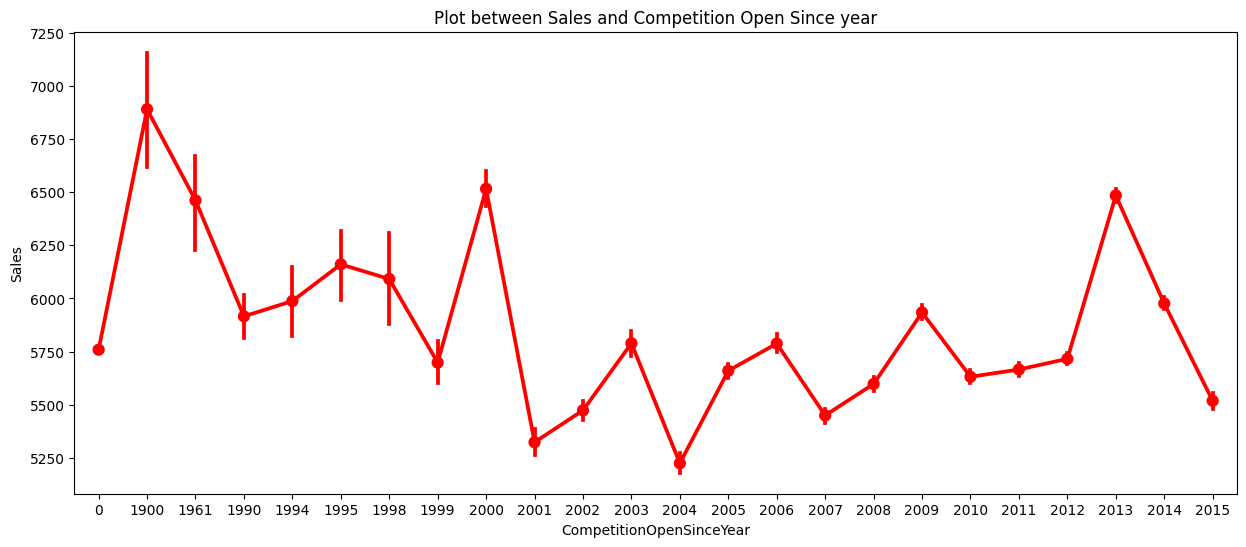

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceYear', y= 'Sales', data=final1, color = 'red')
plt.title('Plot between Sales and Competition Open Since year')

##### 1. Why did you pick the specific chart?

A point plot represents an estimate of central tendency for a numeric variable by the position of the dot and provides some indication of the uncertainty around that estimate using error bars.

##### 2. What is/are the insight(s) found from the chart?

From the Plot we can tell that Sales are high during the year **1900**, as there are very few store were operated of Rossmann so there is **less competition and sales are high**. But as year pass on number of stores increased that means **competition also increased and this leads to decline in the sales.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the insights will help in creating a positive business impact.

#### **Chart - 2:** Plot between **Sales** and **Promo2 Since year**

Text(0.5, 1.0, 'Plot between Sales and Promo2 Since year')

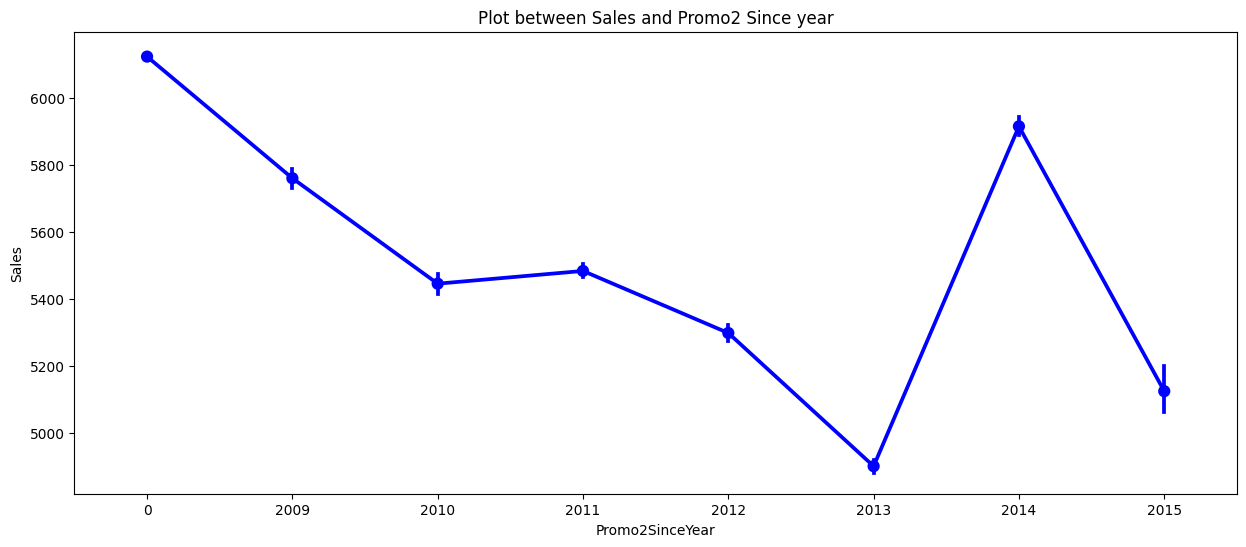

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(15,6))
sns.pointplot(x= 'Promo2SinceYear', y= 'Sales', data=final1, color='blue')
plt.title('Plot between Sales and Promo2 Since year')

##### 1. Why did you pick the specific chart?

A point plot represents an estimate of central tendency for a numeric variable by the position of the dot and provides some indication of the uncertainty around that estimate using error bars.

##### 2. What is/are the insight(s) found from the chart?

Plot between Sales and promo2 since year shows that effect of sales of stores which continue their promotion. this data is available from yaer **2009** to **2015**. Promo2 has very good effect on sales but in year 2013 sales be minimum and also in year **2012** and **2015** sales are very low.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the insights will help in creating a positive business impact.

#### **Chart - 3:** Plot between **Sales** and **Competition Open Since Month**

Text(0.5, 1.0, 'Plot between Sales and Competition Open Since Month')

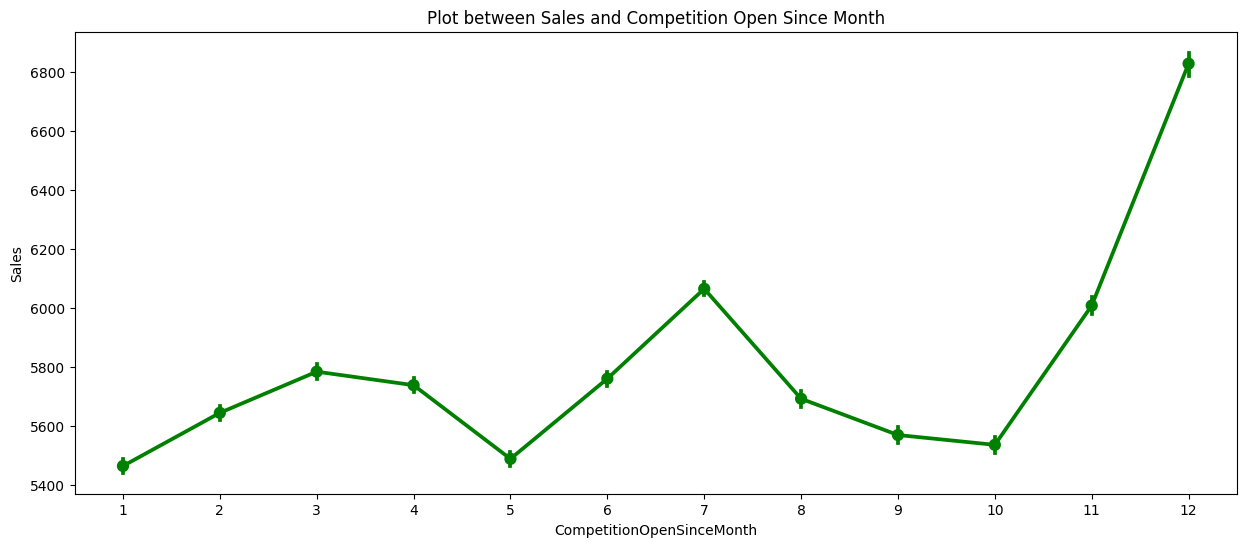

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceMonth', y= 'Sales', data=final1 ,color='green')
plt.title('Plot between Sales and Competition Open Since Month')

##### 1. Why did you pick the specific chart?

A point plot represents an estimate of central tendency for a numeric variable by the position of the dot and provides some indication of the uncertainty around that estimate using error bars.

##### 2. What is/are the insight(s) found from the chart?

Plot between **Competition open since month** and **Sales** explains the sales data in each month of a year. This data shows that sales **after month november increases drastically**. This is very clear that in December month due to Christmas Eve and New year celebration everone is buying. So sales of Rossmann store is very high in **December**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the insights will help in creating a positive business impact.

#### **Chart - 4:** Plot between **Sales** and **Day of Week**

Text(0.5, 1.0, 'Plot between Sales and Day of Week')

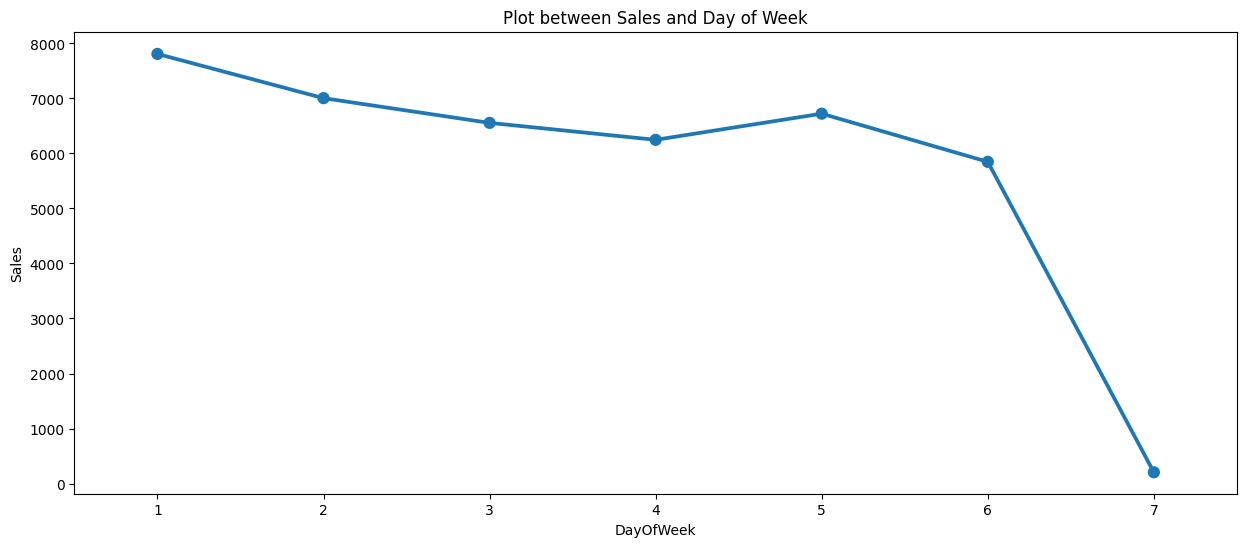

In [ ]:
# Chart - 4 visualization code

plt.figure(figsize=(15,6))
sns.pointplot(x= 'DayOfWeek', y= 'Sales', data=final1)
plt.title('Plot between Sales and Day of Week')

##### 1. Why did you pick the specific chart?

A point plot represents an estimate of central tendency for a numeric variable by the position of the dot and provides some indication of the uncertainty around that estimate using error bars.

##### 2. What is/are the insight(s) found from the chart?

Plot between Sales and Days of week shows that **maximum sales is on Monday** and sales **gradually decreasing to 6th day of week i.e. on Saturday.** It also shows that sales on **Sunday** is almost near to zero as on Sunday maximum stores are closed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the insights will help in creating a positive business impact.

#### **Chart - 5:** Box-plot of **sales** between **Assortment** and **Store type**

In [ ]:
# Chart - 5 visualization code

Text(0.5, 1.0, 'Boxplot For Sales Values on the basis of Assortment Level')

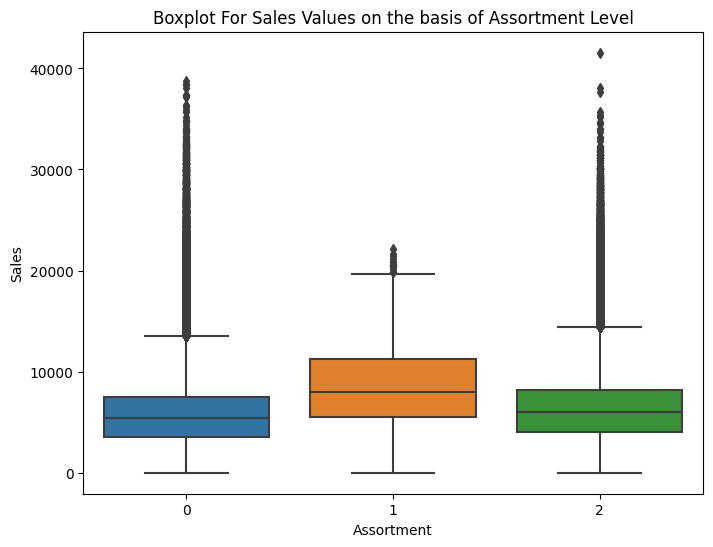

In [ ]:
plt.figure(figsize=(8, 6))
plot_storetype_sales = sns.boxplot(x="Assortment", y="Sales", data=final1)
plt.title('Boxplot For Sales Values on the basis of Assortment Level')

Text(0.5, 1.0, 'Boxplot For Sales Values')

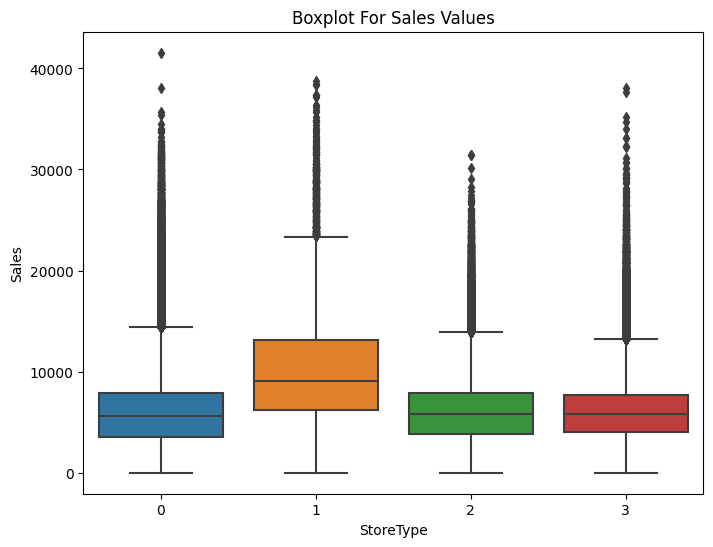

In [ ]:

plt.figure(figsize=(8, 6))
plot_storetype_sales = sns.boxplot(x="StoreType", y="Sales", data=final1)
plt.title('Boxplot For Sales Values')

##### 1. Why did you pick the specific chart?

Box plots provide a quick visual summary of the variability of values in a dataset. They show the median, upper and lower quartiles, minimum and maximum values, and any outliers in the dataset. Outliers can reveal mistakes or unusual occurrences in data.

##### 2. What is/are the insight(s) found from the chart?

* We checked the distributions of the sales of 4 types of stores and spotted a
 **lot of outliers** in each case.

* We checked the sales distributions for each type of Assortments

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the insights will help in creating a positive business impact.

#### **Chart - 6:** Barplot between **promo** and **Sales**

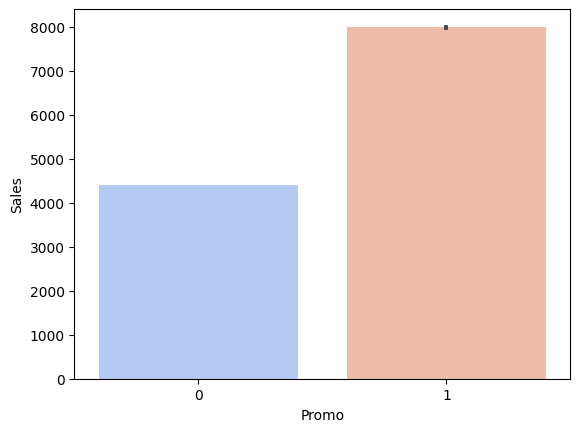

In [ ]:
# Chart - 6 visualization code
promo_sales = sns.barplot(x="Promo", y="Sales", data=final1, palette='coolwarm')


##### 1. Why did you pick the specific chart?

A bar chart, also known as a bar graph, is a graphical representation used to display and compare data across different categories or groups. It uses rectangular bars of varying lengths to represent the values of different variables. Each bar corresponds to a specific category, and the length or height of the bar is proportional to the value it represents.

##### 2. What is/are the insight(s) found from the chart?

Barplot between promo and Sales shows the effect of promotion on Sales. Here **0** represents the **store which didn't opt for promotion** and **1** represents for **stores who opted for promotion**. Those store who took promotions their sales are high as compared to stores who didnt took promotion.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the insights will help in creating a positive business impact.

#### **Chart - 7:** Information on **StoreType**

In [ ]:
# Chart - 7 visualization code
merged_df = pd.merge(rossmann_df, store_new, on='Store', how='left')

<ipython-input-50-2a275acbf942>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  axes[0,1].bar(merged_df.groupby(by="StoreType").sum().Store.index,merged_df.groupby(by="StoreType").sum().Sales/1e9,color=[next(palette),next(palette),next(palette),next(palette)])
<ipython-input-50-2a275acbf942>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  axes[0,1].bar(merged_df.groupby(by="StoreType").sum().Store.index,merged_df.groupby(by="StoreType").sum().Sales/1e9,color=[next(palette),next(palette),next(palette),next(palette)])
<ipython-input-50-2a275acbf942>:9: FutureWarning: The default value of numeric_only in DataF

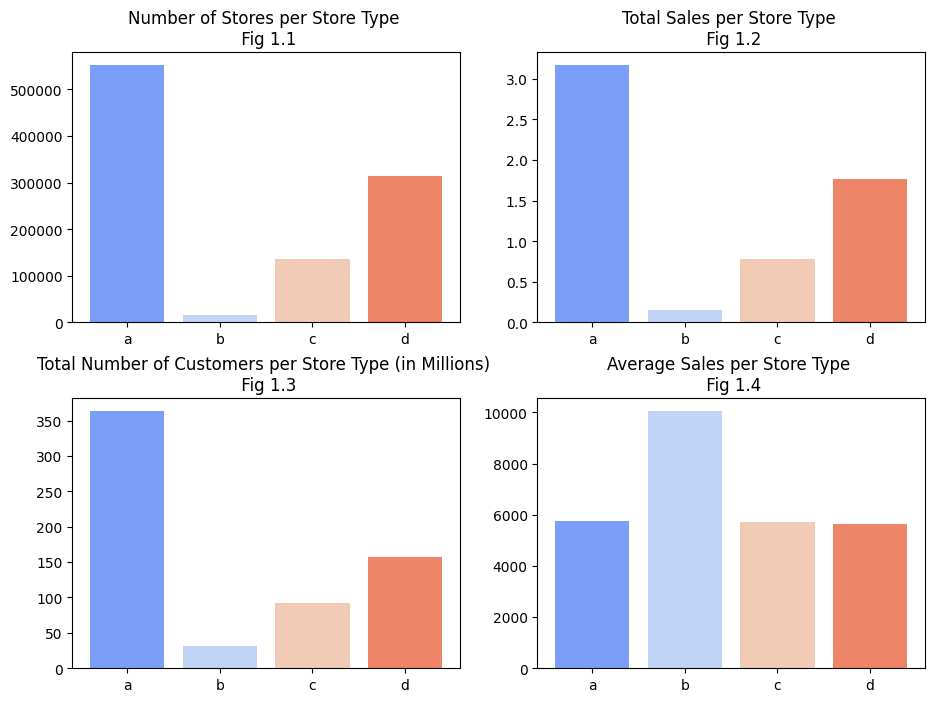

In [ ]:
import itertools
fig, axes = plt.subplots(2, 2,figsize=(11,8) )
palette = itertools.cycle(sns.color_palette(palette='coolwarm',n_colors=4))
plt.subplots_adjust(hspace = 0.28)
axes[0,0].bar(merged_df.groupby(by="StoreType").count().Store.index ,merged_df.groupby(by="StoreType").count().Store,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,0].set_title("Number of Stores per Store Type \n Fig 1.1")
axes[0,1].bar(merged_df.groupby(by="StoreType").sum().Store.index,merged_df.groupby(by="StoreType").sum().Sales/1e9,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,1].set_title("Total Sales per Store Type \n Fig 1.2")
axes[1,0].bar(merged_df.groupby(by="StoreType").sum().Customers.index,merged_df.groupby(by="StoreType").sum().Customers/1e6,color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,0].set_title("Total Number of Customers per Store Type (in Millions) \n Fig 1.3")
axes[1,1].bar(merged_df.groupby(by="StoreType").sum().Customers.index,merged_df.groupby(by="StoreType").Sales.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,1].set_title("Average Sales per Store Type \n Fig 1.4")
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart, also known as a bar graph, is a graphical representation used to display and compare data across different categories or groups. It uses rectangular bars of varying lengths to represent the values of different variables. Each bar corresponds to a specific category, and the length or height of the bar is proportional to the value it represents.

##### 2. What is/are the insight(s) found from the chart?

From this training set we can see that **Storetype A has the highest number of branches,sales and customers from the 4 different storetypes.** But this doesn't mean it's the best performing Storetype.

When looking at the average sales and number of customers, we see that actually it is **Storetype B** who has the **highest average Sales and highest average Number of Customers**.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the insights will help in creating a positive business impact.

#### **Chart - 8:** Lets check which **store type** and **assortment** has the **highest average sales and no. of customers**.

In [ ]:
# Chart - 8 visualization code

# define a function to get count of each unique value from a particular column
# returns a dataframe
def get_count_from_column(dataframe, column_label):
  df_grpd = dataframe[column_label].value_counts()
  df_grpd = pd.DataFrame({'index':df_grpd.index, 'count':df_grpd.values})
  return df_grpd

# define a function to get sum of a certain feature for each unique value from a particular column
# returns a dataframe
def get_sum_from_column(dataframe, column_label, feature):
  df_grpd = dataframe.groupby(column_label)[feature].sum().reset_index(name=feature)
  return df_grpd

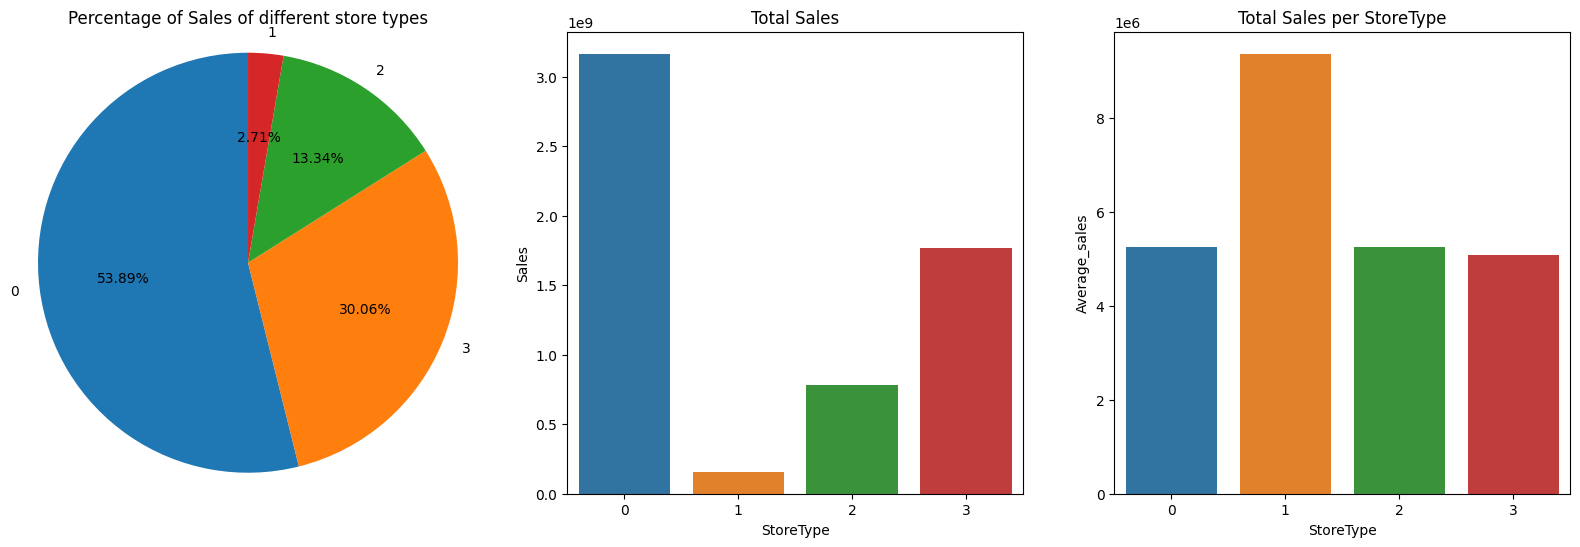

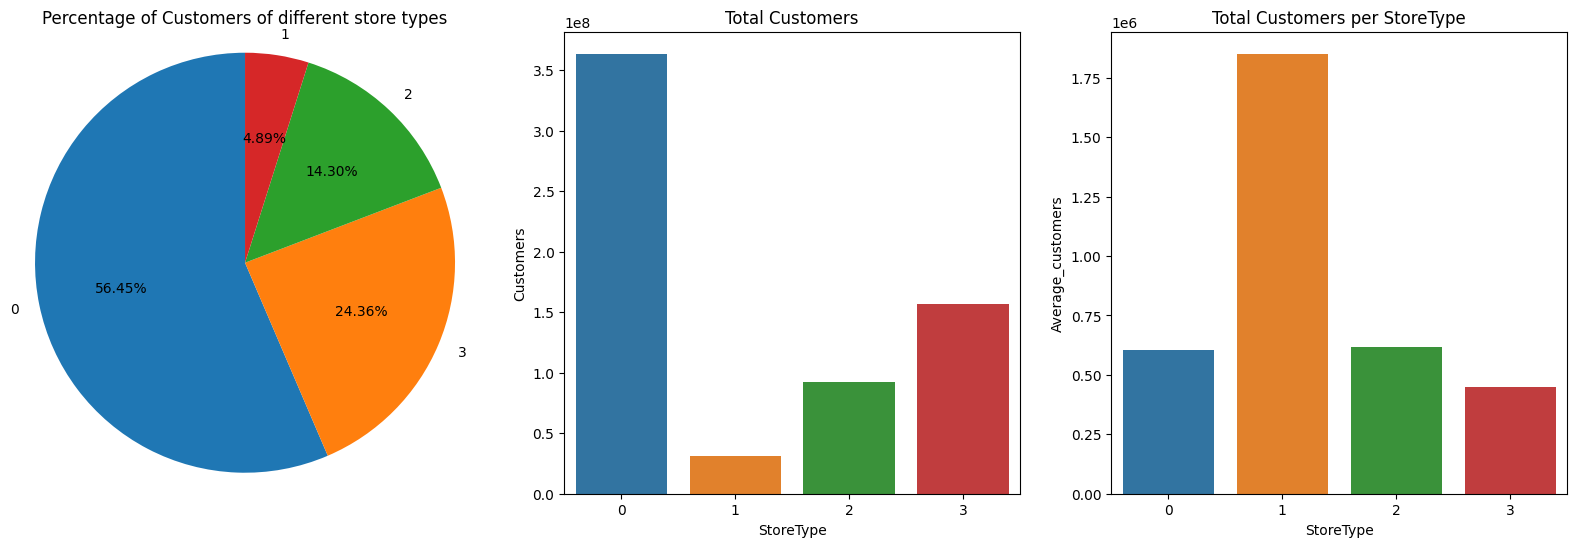

In [ ]:
# get a dataframe with count, sales, average sales, percentage sales, customers, average customers and percentage of customers of different store types
store_type_count_df = get_count_from_column(final1.copy().loc[0:1115, ['Store', 'StoreType']], 'StoreType').rename(columns={'index':'StoreType'})

store_type_sales_sum_df = get_sum_from_column(final1, 'StoreType', 'Sales')
store_type_df = store_type_count_df.merge(right=store_type_sales_sum_df, on='StoreType')
store_type_df['Percent_sales'] = round(store_type_df['Sales']/store_type_df['Sales'].sum()*100, 2)
store_type_df['Average_sales'] = round(store_type_df['Sales']/store_type_df['count'], 2)

store_type_customer_sum_df = get_sum_from_column(final1, 'StoreType', 'Customers')
store_type_df = store_type_df.merge(right=store_type_customer_sum_df, on='StoreType')
store_type_df['Percent_customers'] = round(store_type_df['Customers']/store_type_df['Customers'].sum()*100, 2)
store_type_df['Average_customers'] = round(store_type_df['Customers']/store_type_df['count'], 2)

for feature in ('Sales', 'Customers'):
  fig, axes = plt.subplots(1, 3, figsize=(20, 6))
  axes[0].pie(store_type_df.loc[:, feature], labels=store_type_df.loc[:, 'StoreType'], autopct='%1.2f%%', startangle=90)
  axes[0].axis('equal')
  axes[0].set_title(f"Percentage of {feature} of different store types")

  sns.barplot(ax=axes[1], x=store_type_df['StoreType'], y=store_type_df[feature])
  axes[1].set_title(f"Total {feature}")

  sns.barplot(ax=axes[2], x=store_type_df['StoreType'], y=store_type_df['Average_' + feature.lower()])
  axes[2].set_title(f"Total {feature} per StoreType")

  plt.show()

##### 1. Why did you pick the specific chart?

**Pie charts** can show the proportions of different categories in total, and **bar charts** are more suitable for comparing the sizes of the categories. Combining the two charts can provide a more complete picture of the data.

##### 2. What is/are the insight(s) found from the chart?

Even though the volume of sales and customers is low, store type 1 has the highest average sales and customers. **This means store type 1 is more preferred by customers**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the insights will help in creating a positive business impact.

#### **Chart - 9:** - Correlation Heatmap

<ipython-input-53-114ad8bfa6af>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = final1.corr()


<Axes: >

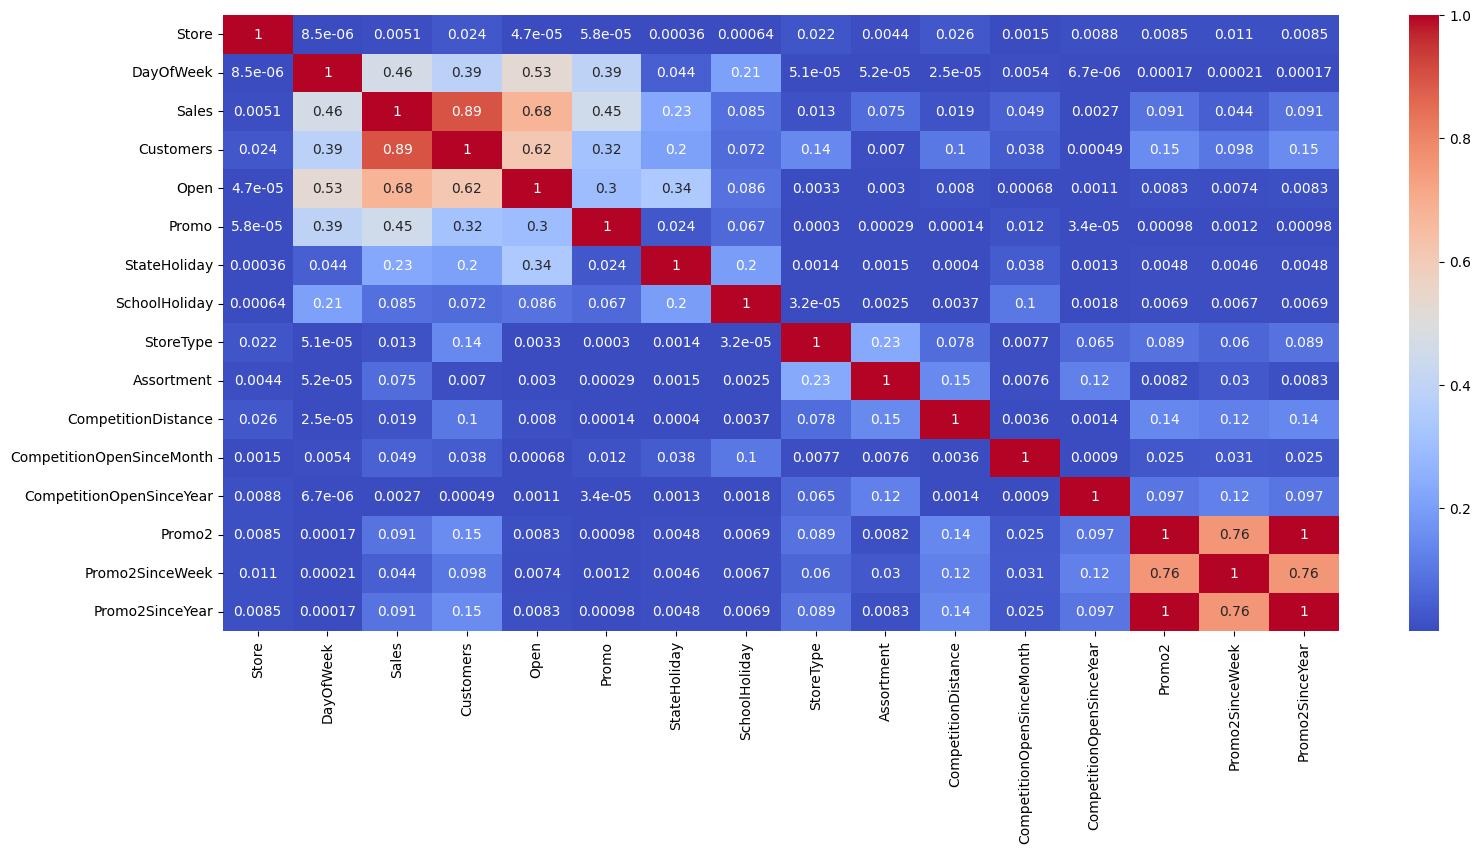

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(18,8))
correlation = final1.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

## ***5. Feature Engineering & Data Pre-processing***

###1. Handling Outliers

#### Sales & Customers

Outlier detection for sales and customers can be done together since we have already established they have almost linear relationship. This way, detection and removal of outliers will be more convenient and accurate.

**Store Type**

Each store type records sales in different range. So it is more appropriate to detect outliers separately for each store type.

In [ ]:

# generate scatter plots to check the linearity between sales and customers for each unique value in a feature
# plots scatter plots
def scatter_plot_bw_sales_customers_with_feature_unique_values(dataframe, feature):
  import math
  unique_values = sorted(final1[feature].unique().tolist())

  columns_num = 2
  rows_num = math.ceil(len(unique_values)/columns_num)
  fig, axes = plt.subplots(rows_num, columns_num, figsize=(10*columns_num, 8*rows_num))

  row = -1
  column = columns_num - 1
  for unique_value in unique_values:
    if column == (columns_num - 1):
      row += 1
      column = 0
    else:
      column += 1
    temp_df = dataframe[dataframe[feature] == unique_value]
    sns.scatterplot(ax=axes[row, column], x='Customers', y='Sales', data=temp_df)
    lin_fit = np.polyfit(temp_df['Customers'], temp_df['Sales'], 1)
    lin_func = np.poly1d(lin_fit)(temp_df['Customers'])
    axes[row, column].plot(temp_df['Customers'], lin_func, "r--", lw=1)
    axes[row, column].set_title(f"Sales vs Customers for {unique_value}\nCorrelation = {round(temp_df['Customers'].corr(temp_df['Sales'])*100, 2)}%")

  if len(unique_values) % columns_num != 0:
    for column_num in range(column + 1, columns_num):
      fig.delaxes(axes[rows_num - 1][column_num])

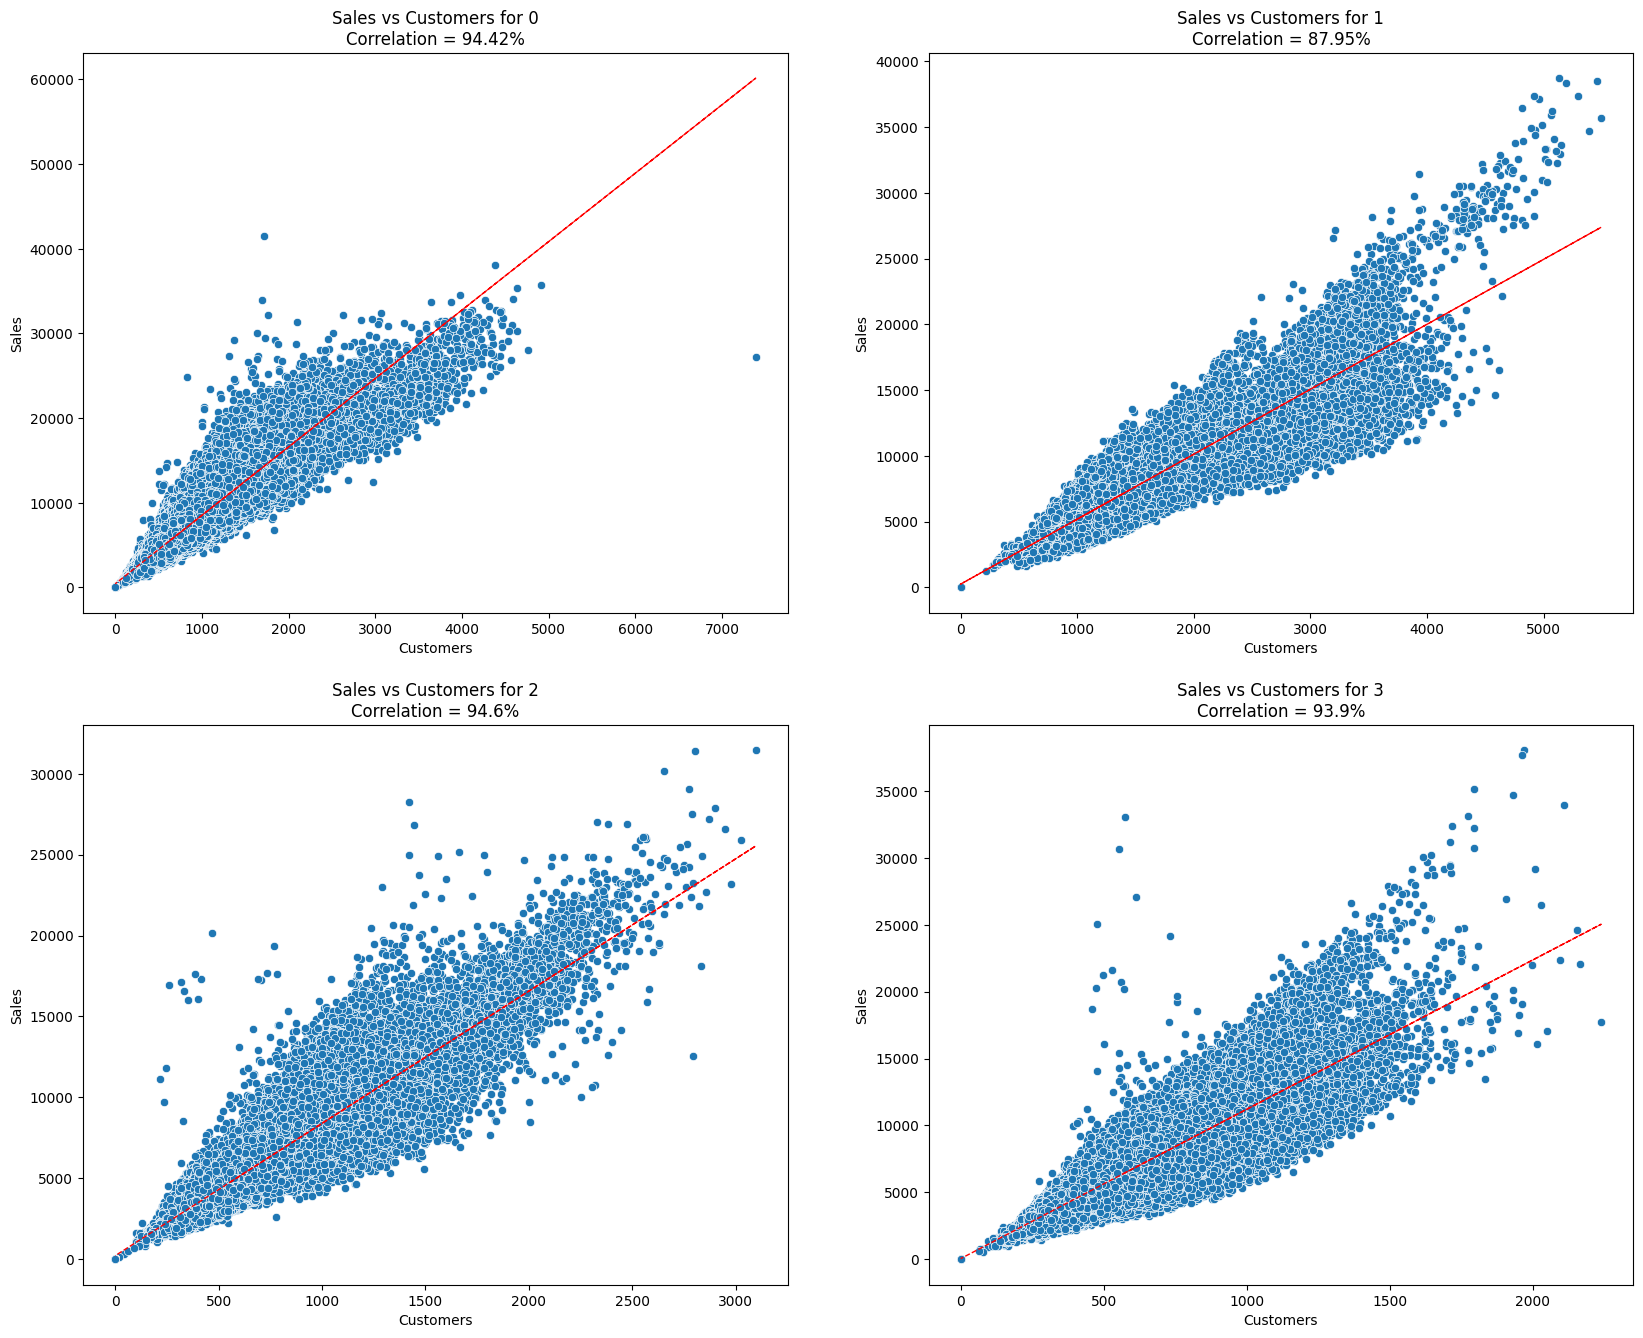

In [ ]:
# generate scatter plots to check the linearity between sales and customers for each store type
scatter_plot_bw_sales_customers_with_feature_unique_values(final1, 'StoreType')

Outliers have been identified from the scatter plot. Now lets remove them.

In [ ]:
# remove outliers with respect to store types
a_filter = final1[(final1['StoreType'] == 'a') & (((final1['Sales'] > 20000) & (final1['Customers'] < 1000)) |
                                                            (final1['Sales'] > 40000) | (final1['Customers'] > 7000))].index
c_filter = final1[(final1['StoreType'] == 'c') & (((final1['Sales'] > 9000) & (final1['Customers'] < 500)) |
                                                            ((final1['Sales'] < 15000) & (final1['Customers'] > 2500)) |
                                                            ((final1['Sales'] > 25000) & (final1['Customers'] < 2000)) |
                                                             (final1['Sales'] > 30000))].index
d_filter = final1[(final1['StoreType'] == 'd') & ((final1['Sales'] > 17500) & (final1['Customers'] < 875) |
                                                            (final1['Sales'] > 31000) | (final1['Customers'] > 2000))].index

final1.drop(a_filter, inplace=True)
final1.drop(c_filter, inplace=True)
final1.drop(d_filter, inplace=True)

Now lets check if the outliers are removed

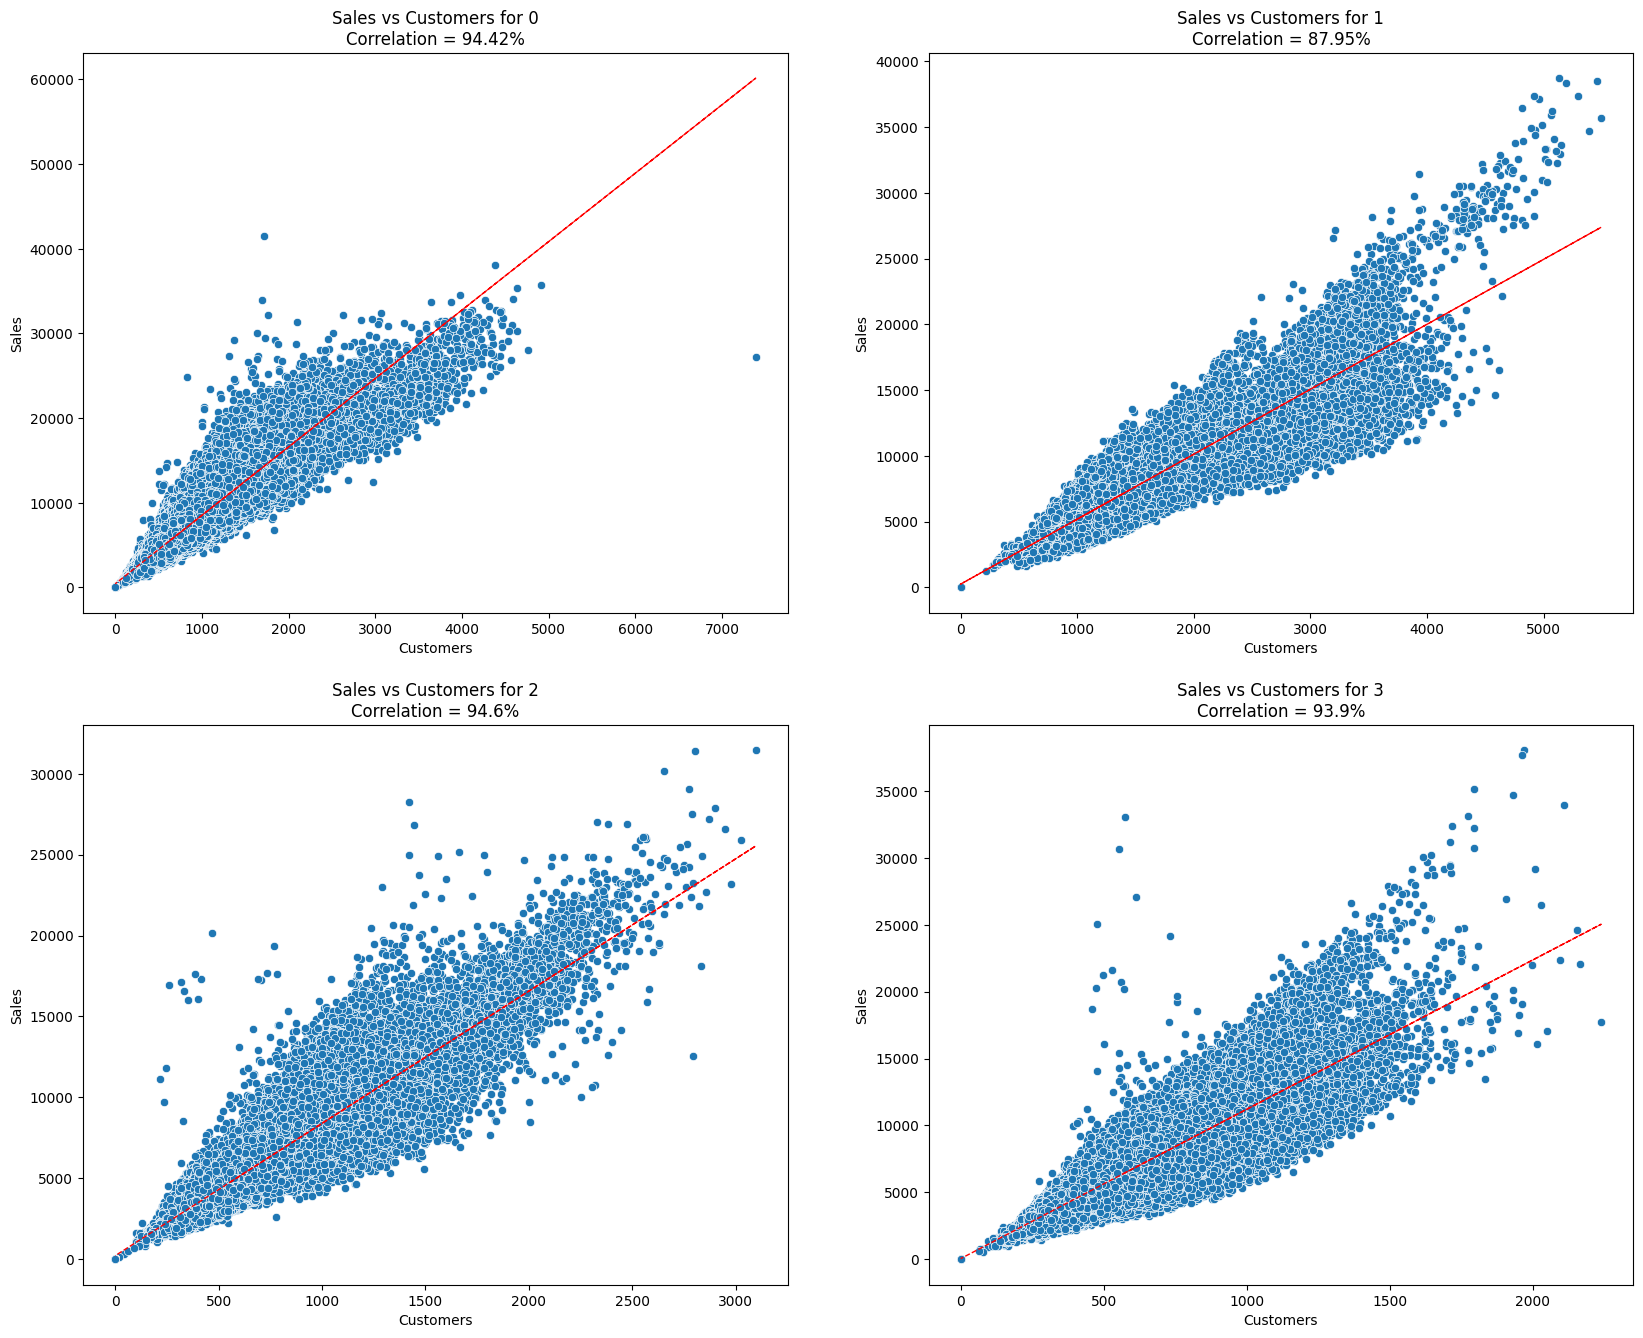

In [ ]:
# generate scatter plots to check the linearity between sales and customers for each store type
scatter_plot_bw_sales_customers_with_feature_unique_values(final1, 'StoreType')

There are still outliers present in the data,the Sales vs Customers scatter plot has been cleared of outliers and the remaining data maintains a good relationship between sales and customers. So, these outliers are just deviation from usual values and not errors in the measurement. Eliminating them can cause overfitting, so we will keep these outliers.

**Assortment**

Each assortment records sales in different range. So it is more appropriate to detect outliers separately for each assortment.

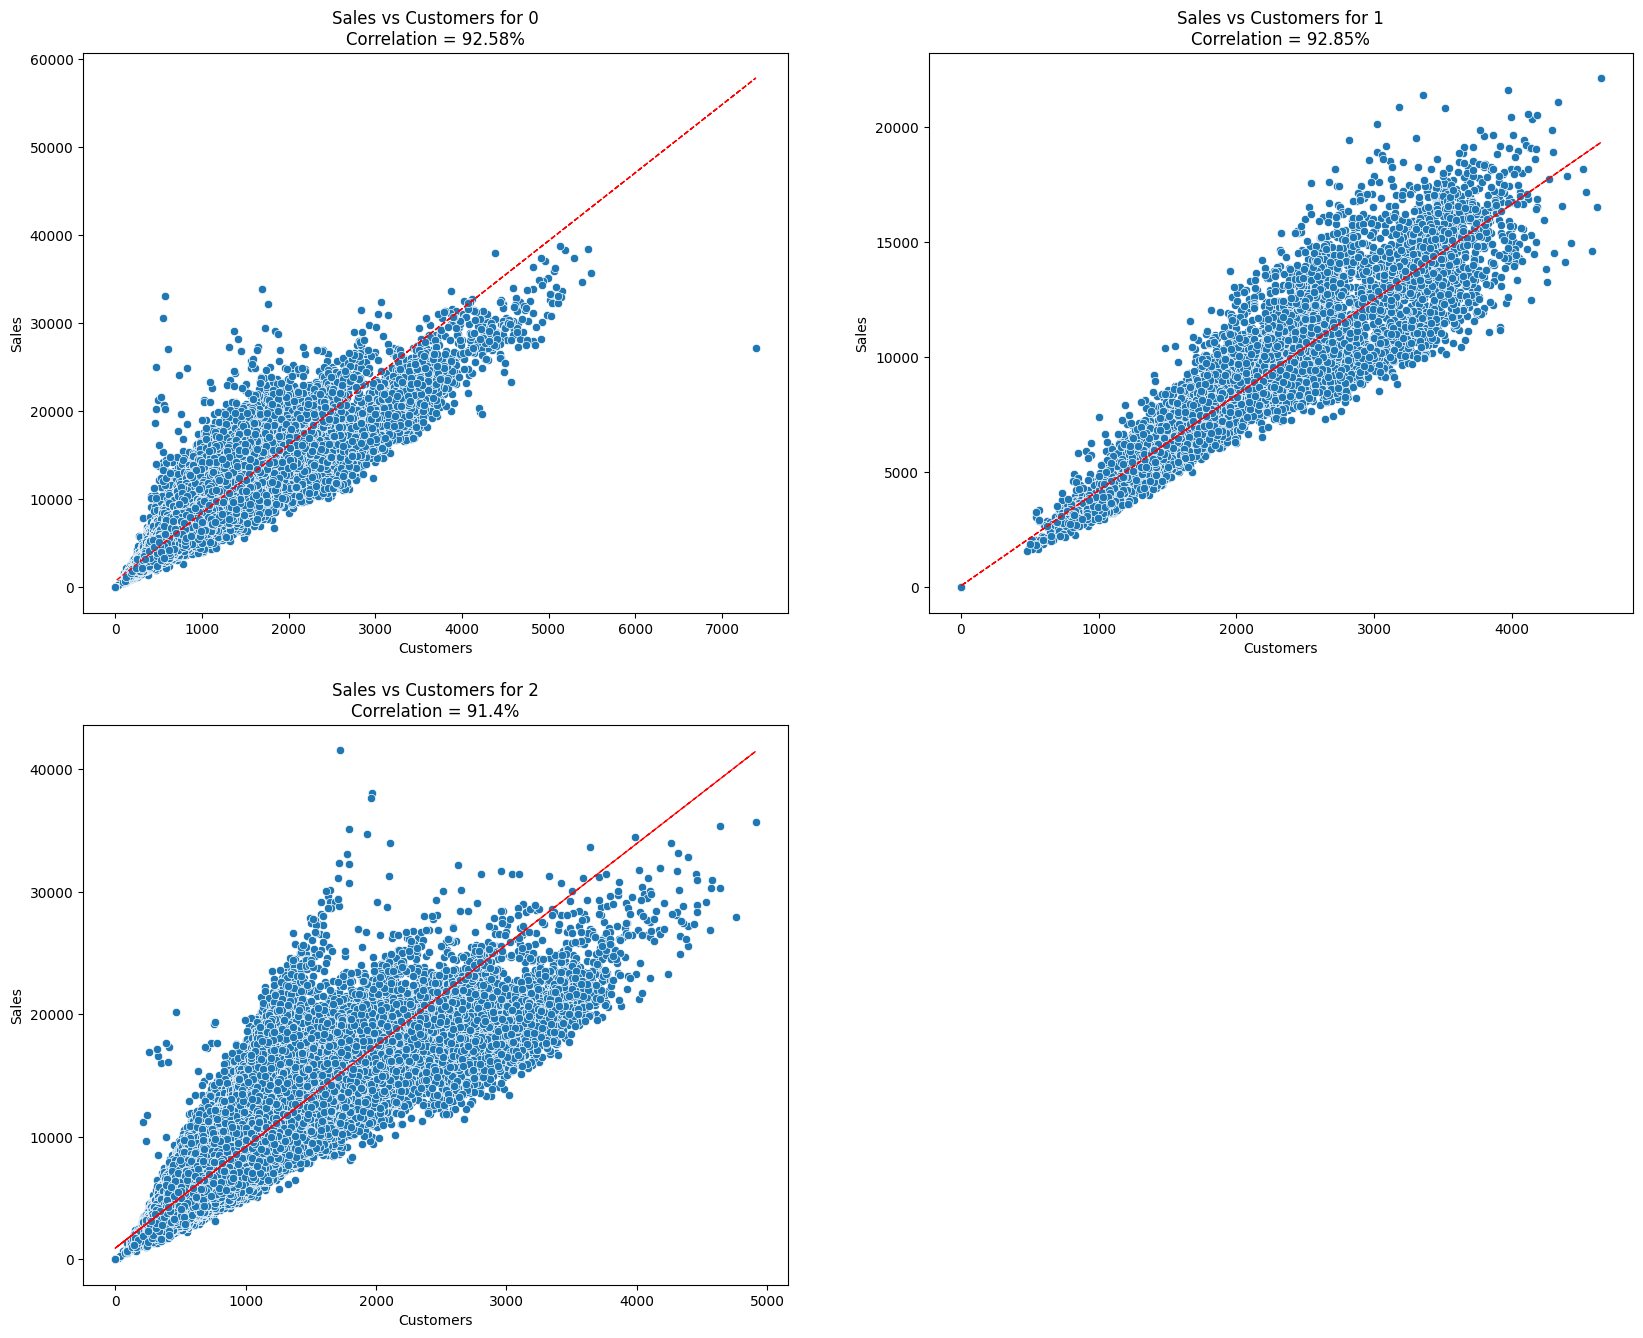

In [ ]:
# generate scatter plots to check the linearity between sales and customers for each assortment
scatter_plot_bw_sales_customers_with_feature_unique_values(final1, 'Assortment')

Outliers have been identified from the scatter plot. Now lets try to remove them.

In [ ]:
# remove outliers with respect to assortments
a_filter = final1[(final1['Assortment'] == 'a') & (((final1['Sales'] > 20000) & (final1['Customers'] < 1000)) |
                                                             ((final1['Sales'] > 27500) & (final1['Customers'] < 2000)) |
                                                             ((final1['Sales'] > 31000) & (final1['Customers'] < 3250)) |
                                                              (final1['Sales'] > 35000))].index
final1.drop(a_filter, inplace=True)

Now lets check if the outliers are removed

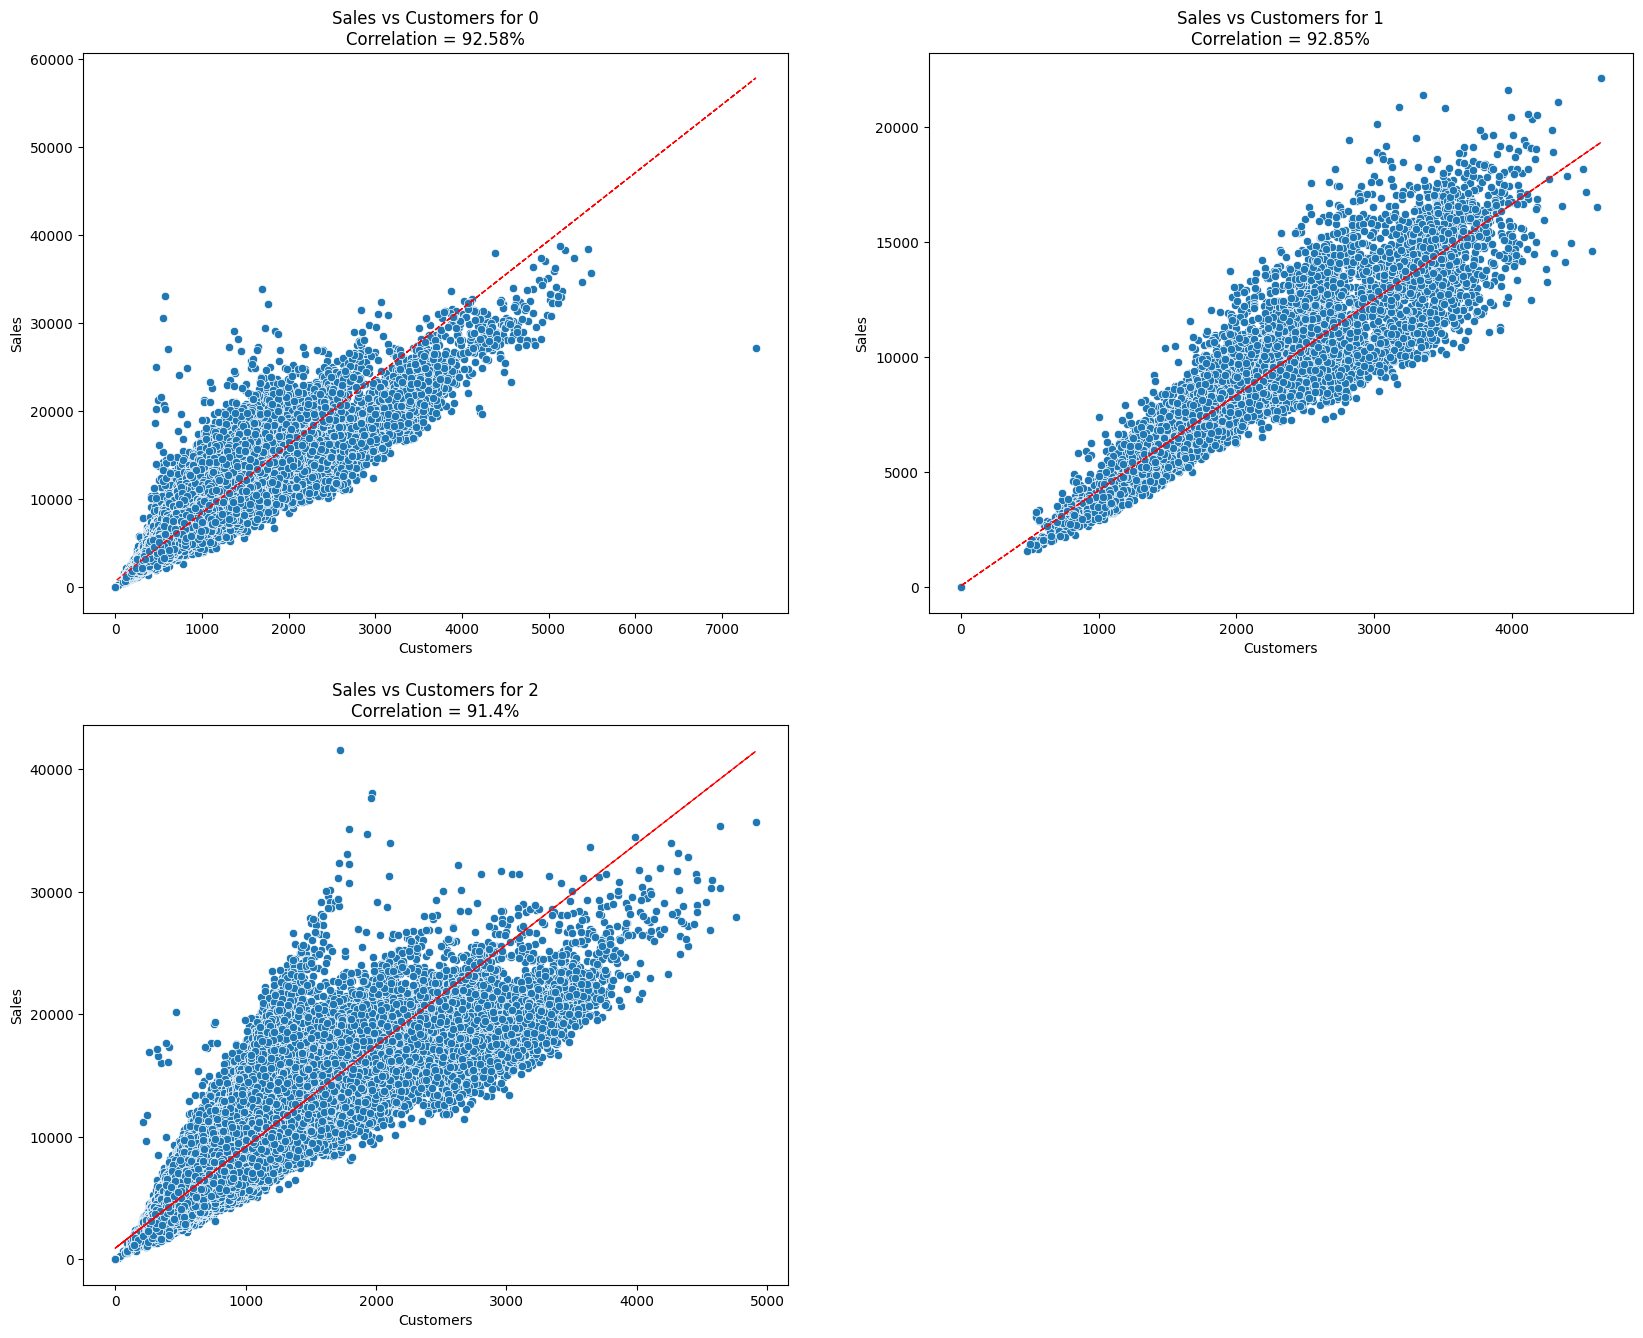

In [ ]:
# generate scatter plots to check the linearity between sales and customers for each store type
scatter_plot_bw_sales_customers_with_feature_unique_values(final1, 'Assortment')

Lets check if there is still ouliers in the data.

There are still outliers present in the data, the Sales vs Customers scatter plot has been cleared of outliers and the remaining data maintains a good relationship between sales and customers. So, these outliers are just deviation from usual values and not errors in the measurement. Eliminating them can cause overfitting, so we will keep these outliers.

### 2. Features Correlation [Numerical + Categorical(encoded)]

In [ ]:
numeric_features = ['DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Promo2SinceWeek',
                    'CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear',
                    'Promo2','Promo2SinceWeek','Promo2SinceYear']

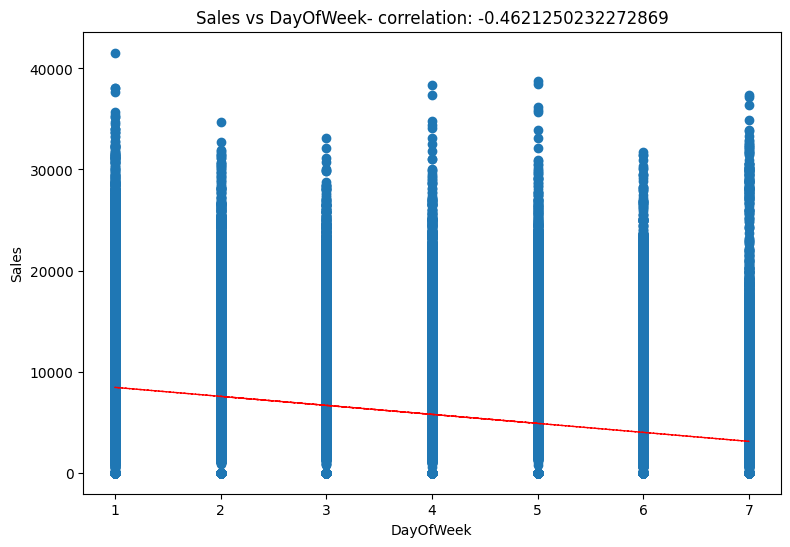

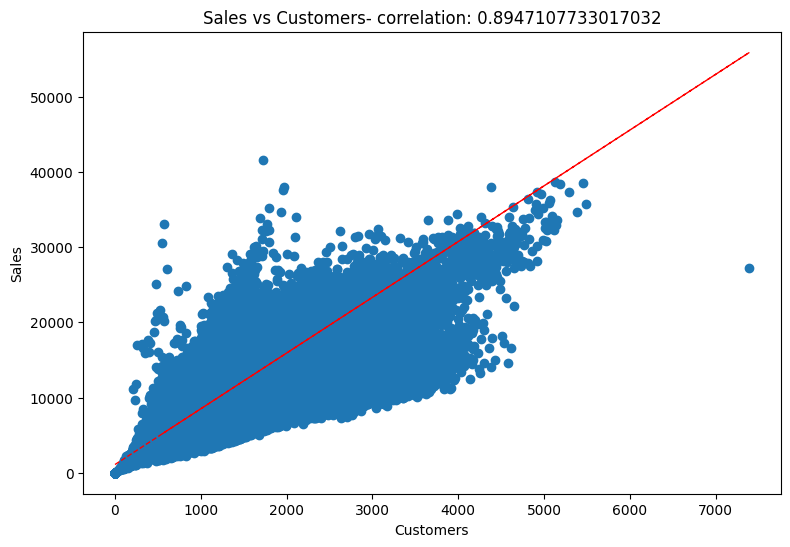

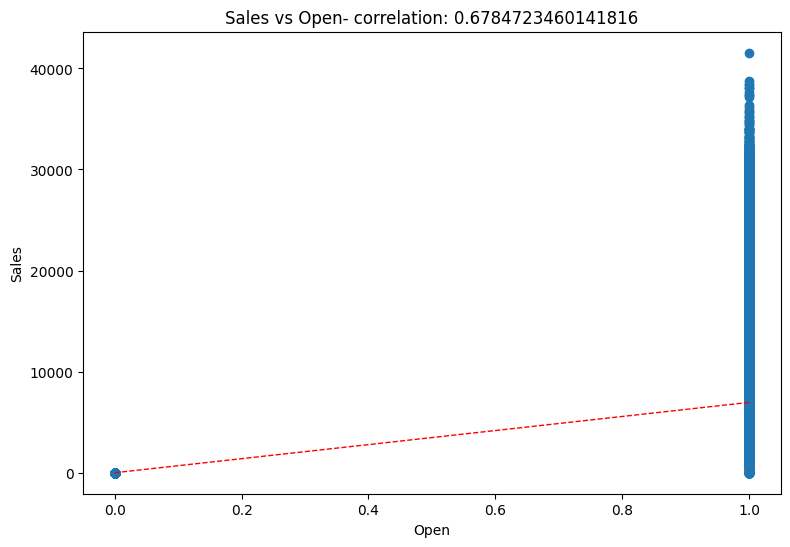

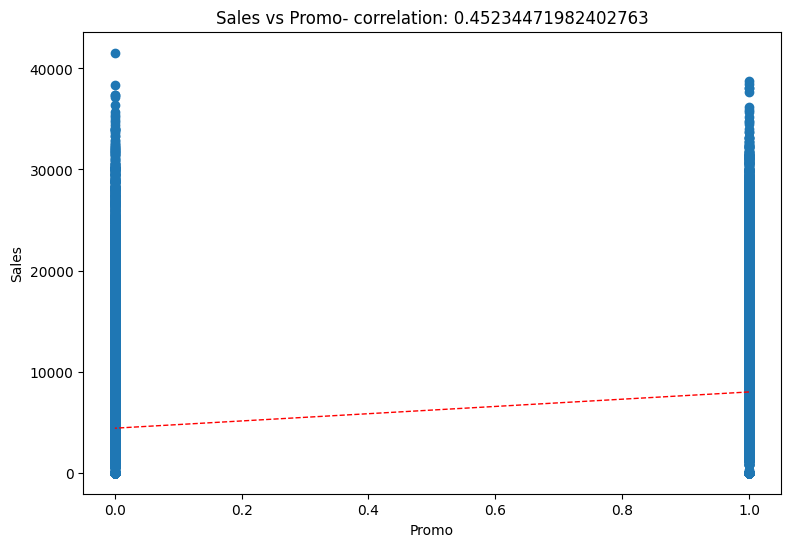

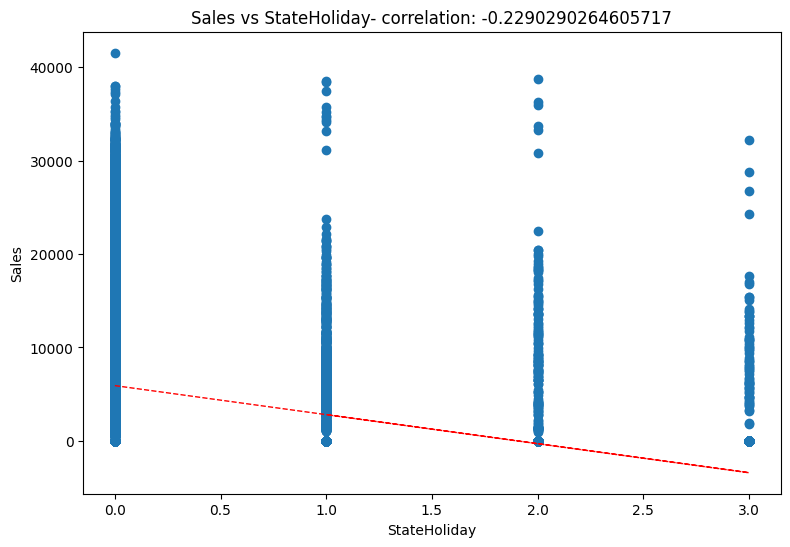

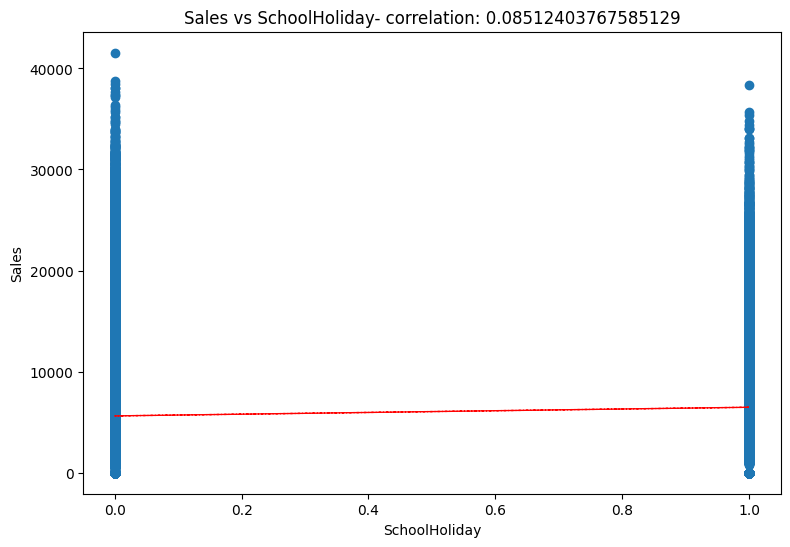

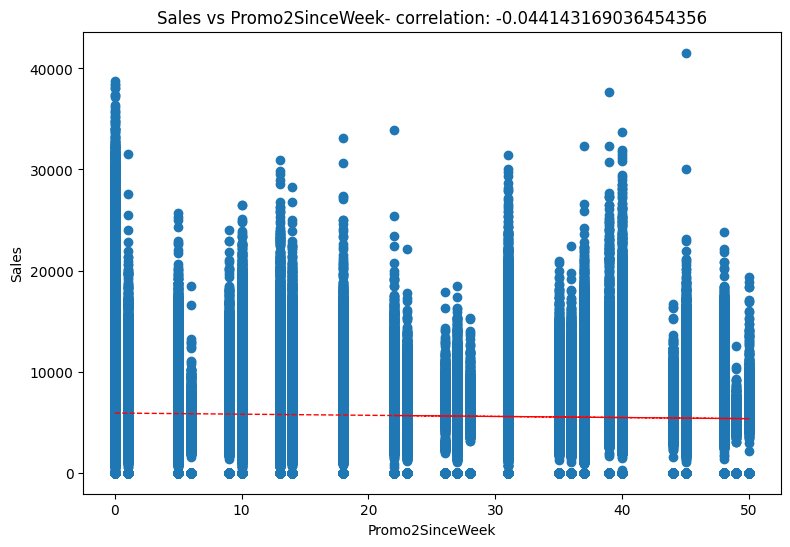

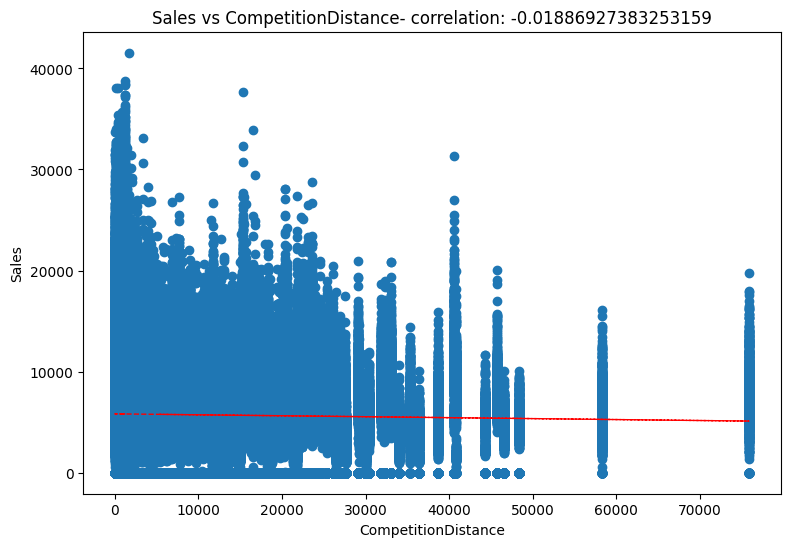

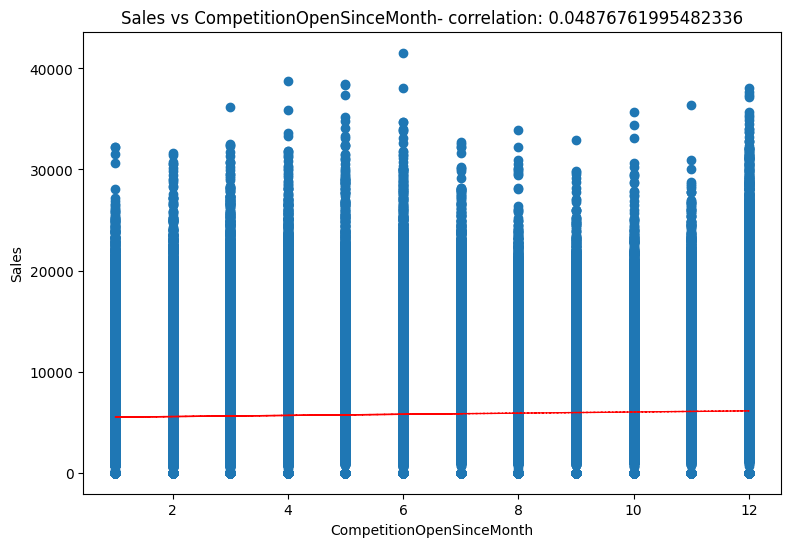

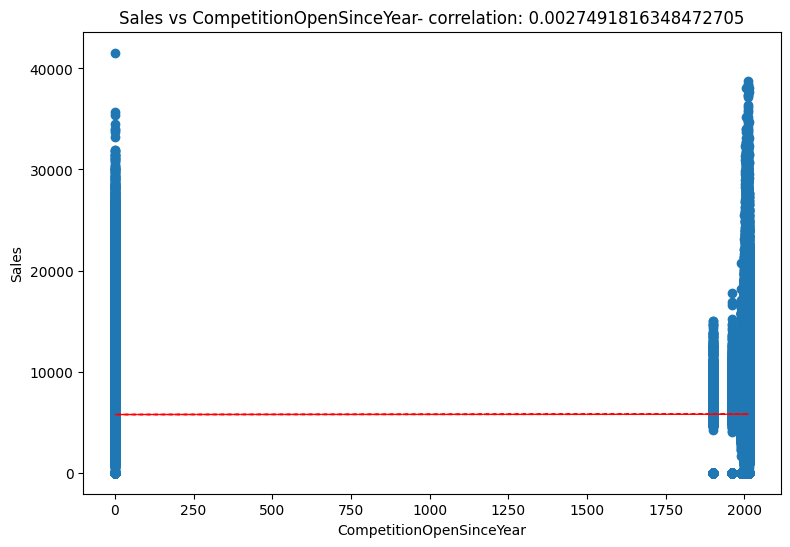

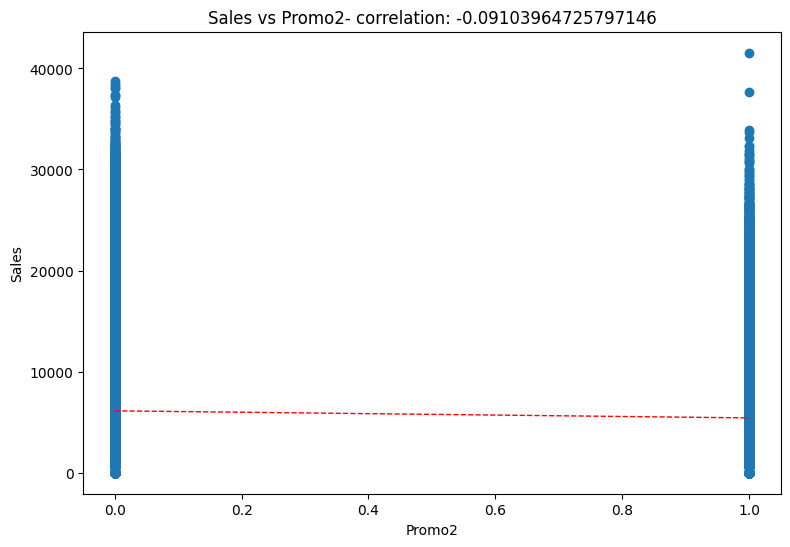

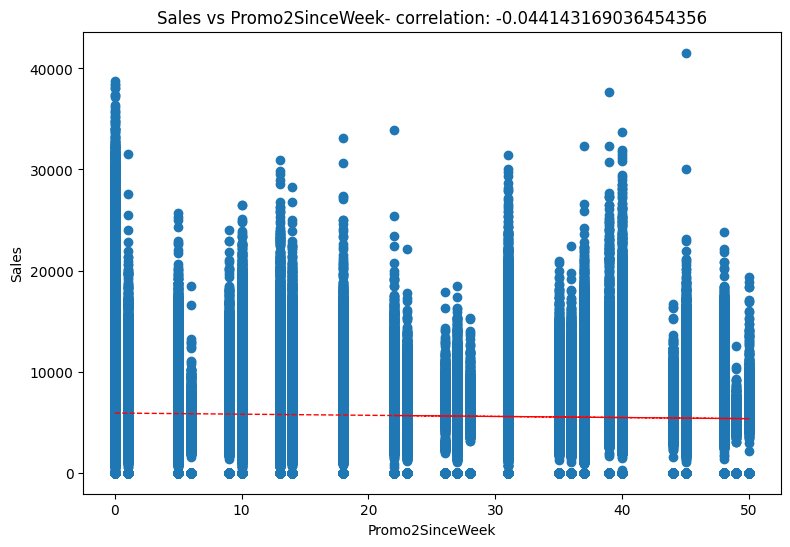

In [ ]:
for col in numeric_features[0:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = final1[col]
    label = final1['Sales']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Sales')
    ax.set_title('Sales vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(final1[col], final1['Sales'], 1)
    y_hat = np.poly1d(z)(final1[col])

    plt.plot(final1[col], y_hat, "r--", lw=1)

plt.show()

We checked the correlation of all the features with our **Target Variable**.

#### 2. Feature Selection

<ipython-input-22-9148ece640a1>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=axes[row, column], a=dataframe[feature])
<ipython-input-22-9148ece640a1>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=axes[row, column], a=dataframe[feature])
<ipython-input-22-9148ece640a1>:19: UserWarn

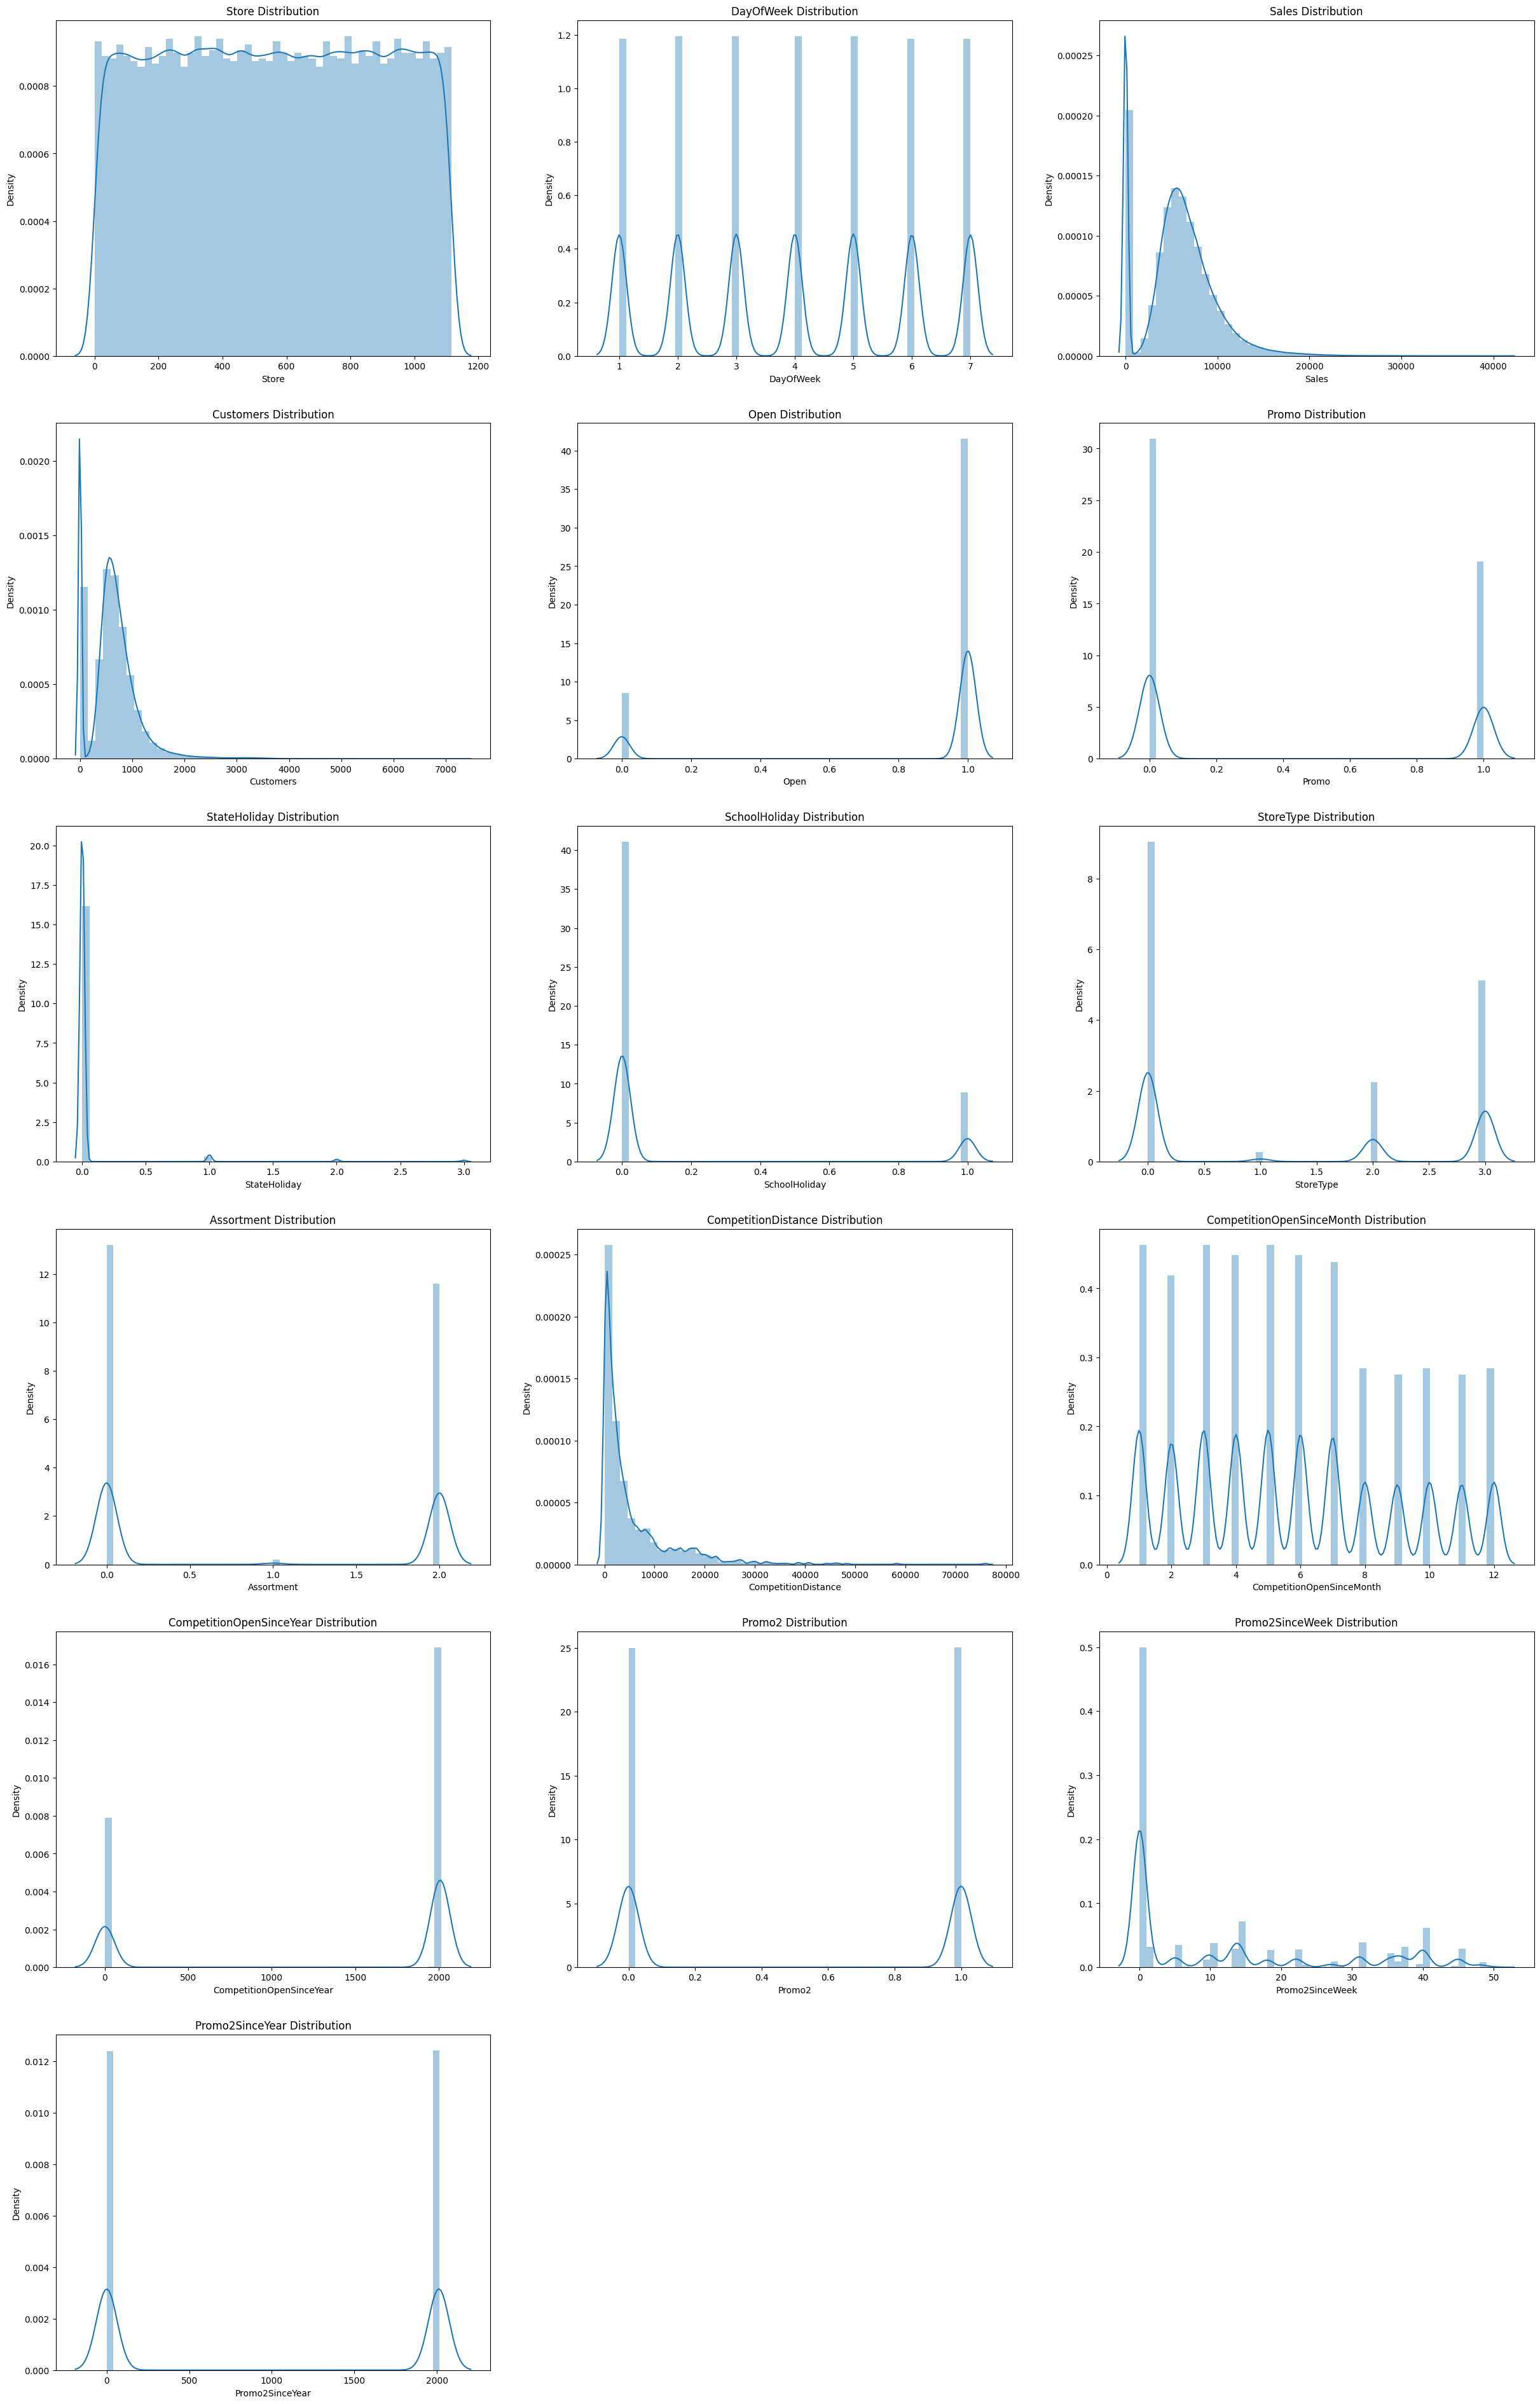

In [ ]:
# Select your features wisely to avoid overfitting
density_plot_of_all_features(final1)

Let's check the distributions of each numerical feature.

<ipython-input-64-b9b596d5648a>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final1[feature]).set(title=f'{feature} Distribution')


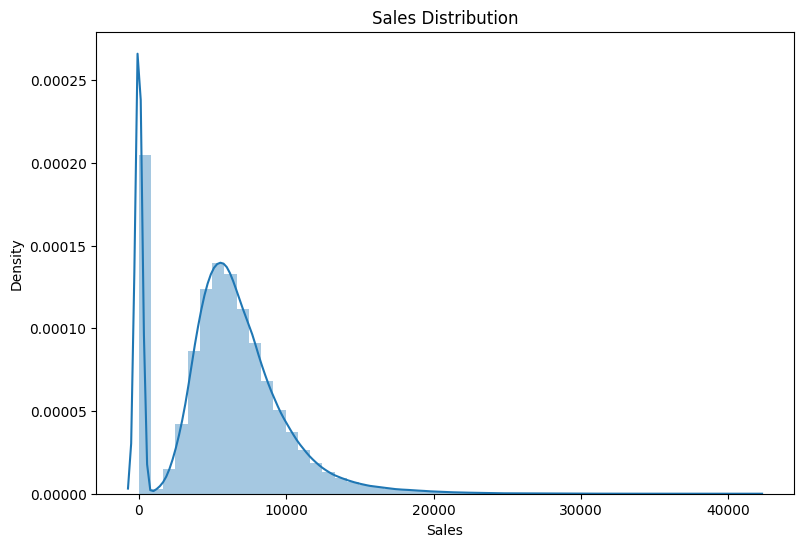

<ipython-input-64-b9b596d5648a>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final1[feature]).set(title=f'{feature} Distribution')


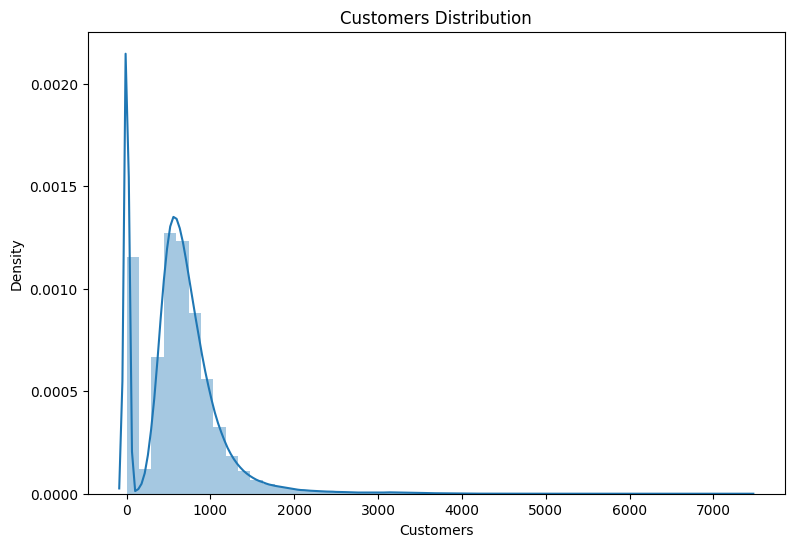

<ipython-input-64-b9b596d5648a>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final1[feature]).set(title=f'{feature} Distribution')


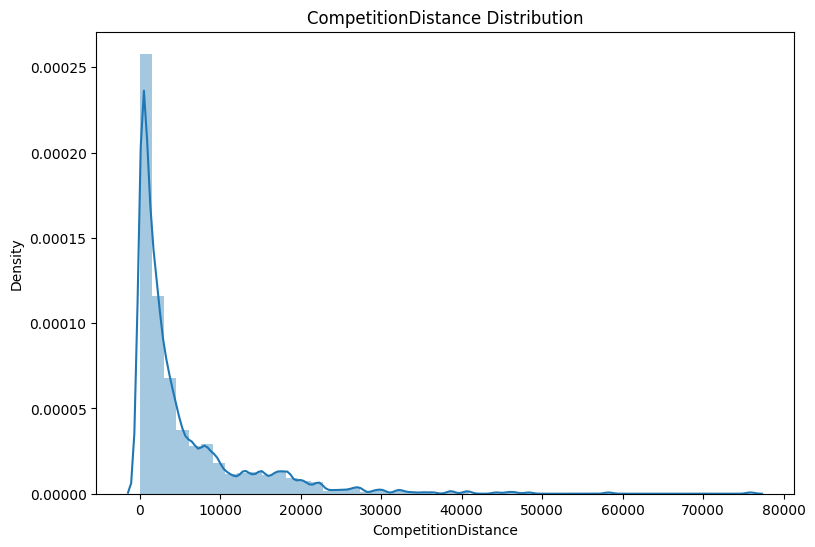

<ipython-input-64-b9b596d5648a>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final1[feature]).set(title=f'{feature} Distribution')


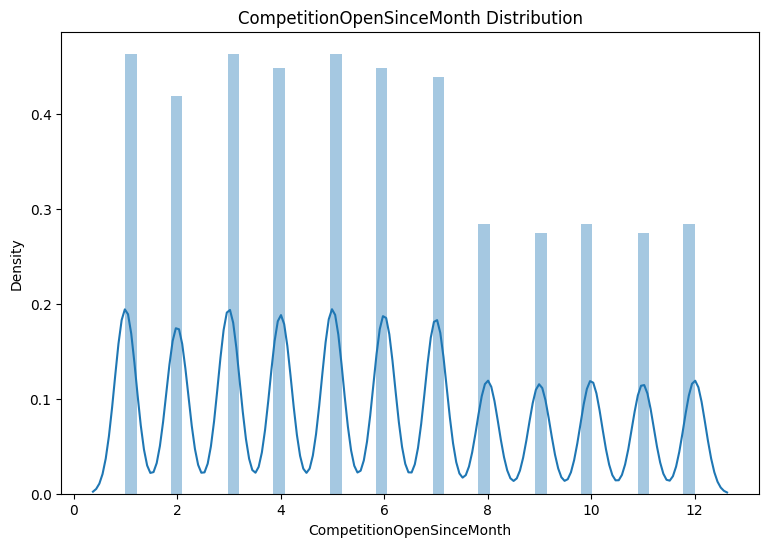

<ipython-input-64-b9b596d5648a>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final1[feature]).set(title=f'{feature} Distribution')


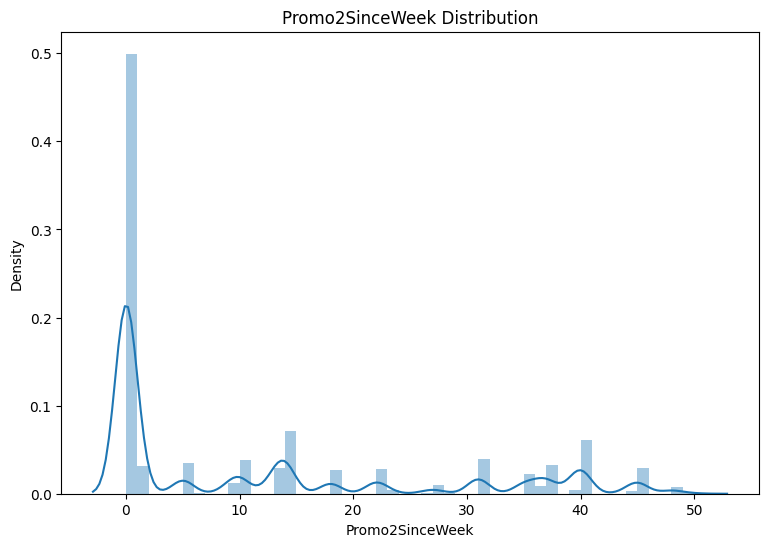

In [ ]:
# numerical features
numerical_features = ['Sales', 'Customers', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'Promo2SinceWeek']

# generate density plot for numerical features
for feature in numerical_features:
  plt.figure(figsize=(9, 6))
  sns.distplot(final1[feature]).set(title=f'{feature} Distribution')
  plt.show()

##### What all feature selection methods have you used  and why?

* Checking distributions of all features and transforming them if required.
* After this, we will check the multicollinearity among features and try reduce that by dropping unwanted features.

### 3. Multicollinearity

In [ ]:
# Scaling your data
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(final1[[i for i in final1.describe().columns if i not in ['Sales']]])

variables           VIF
0                       Store  3.698849e+00
1                   DayOfWeek  4.105225e+00
2                   Customers  5.237282e+00
3                        Open  9.376848e+00
4                       Promo  1.917234e+00
5                StateHoliday  1.187994e+00
6               SchoolHoliday  1.330849e+00
7                   StoreType  1.940349e+00
8                  Assortment  2.045194e+00
9         CompetitionDistance  1.591292e+00
10  CompetitionOpenSinceMonth  3.849073e+00
11   CompetitionOpenSinceYear  2.992815e+00
12                     Promo2  1.575752e+06
13            Promo2SinceWeek  3.998443e+00
14            Promo2SinceYear  1.574715e+06

Multicolinearity of columns like 'Promo2SinceYear' is pretty high therefore I decided to drop it.

In [ ]:
calc_vif(final1[[i for i in final1.describe().columns if i not in ['Sales','Promo2SinceYear']]])

variables       VIF
0                       Store  3.696403
1                   DayOfWeek  4.104888
2                   Customers  5.236788
3                        Open  9.375773
4                       Promo  1.917192
5                StateHoliday  1.187994
6               SchoolHoliday  1.330832
7                   StoreType  1.934515
8                  Assortment  2.039582
9         CompetitionDistance  1.584854
10  CompetitionOpenSinceMonth  3.848299
11   CompetitionOpenSinceYear  2.986944
12                     Promo2  4.840137
13            Promo2SinceWeek  3.765533

## ***6. ML Model Implementation***

### ML Model - 1 (Linear Regresson)

In [ ]:

from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
import math
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,classification_report

We use dummy variables for the column 'PromoInterval'

In [ ]:
final1 = pd.get_dummies(final1, columns=['PromoInterval'])

In [ ]:
final1.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1             0   
1      2          5 2015-07-31   6064        625     1      1             0   
2      3          5 2015-07-31   8314        821     1      1             0   
3      4          5 2015-07-31  13995       1498     1      1             0   
4      5          5 2015-07-31   4822        559     1      1             0   

   SchoolHoliday  StoreType  ...  CompetitionDistance  \
0              1          2  ...               1270.0   
1              1          0  ...                570.0   
2              1          0  ...              14130.0   
3              1          2  ...                620.0   
4              1          0  ...              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                          7                      2008       0   
1                          7                      2007       1   
2                          7                      2006       1   
3                          7                      2009       0   
4                          7                      2015       0   

   Promo2SinceWeek  Promo2SinceYear  PromoInterval_0  \
0              0.0                0                1   
1             13.0             2010                0   
2             14.0             2011                0   
3              0.0                0                1   
4              0.0                0                1   

   PromoInterval_Feb,May,Aug,Nov  PromoInterval_Jan,Apr,Jul,Oct  \
0                              0                              0   
1                              0                              1   
2                              0                              1   
3                              0                              0   
4                              0                              0   

   PromoInterval_Mar,Jun,Sept,Dec  
0                               0  
1                               0  
2                               0  
3                               0  
4                               0  

[5 rows x 21 columns]

In [ ]:
final1.shape

(1017209, 21)

We define dependent and independent variables and convert them into arrays

In [ ]:
# defining dependent variable
dep_var = 'Sales'

# defining independent variable
indep_var = final1.columns.drop(['Store', 'Promo2SinceYear','Date','Sales'])

In [ ]:
# Create the data of independent variables
U = final1[indep_var].values

# Create the dependent variable data
v = final1[dep_var].values

In [ ]:
final1[indep_var]

DayOfWeek  Customers  Open  Promo  StateHoliday  SchoolHoliday  \
0                5        555     1      1             0              1   
1                5        625     1      1             0              1   
2                5        821     1      1             0              1   
3                5       1498     1      1             0              1   
4                5        559     1      1             0              1   
...            ...        ...   ...    ...           ...            ...   
1017204          2          0     0      0             1              1   
1017205          2          0     0      0             1              1   
1017206          2          0     0      0             1              1   
1017207          2          0     0      0             1              1   
1017208          2          0     0      0             1              1   

         StoreType  Assortment  CompetitionDistance  \
0                2           0               1270.0   
1                0           0                570.0   
2                0           0              14130.0   
3                2           2                620.0   
4                0           0              29910.0   
...            ...         ...                  ...   
1017204          0           0               1900.0   
1017205          2           2               1880.0   
1017206          0           2               9260.0   
1017207          0           2                870.0   
1017208          3           2               5350.0   

         CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                                7                      2008       0   
1                                7                      2007       1   
2                                7                      2006       1   
3                                7                      2009       0   
4                                7                      2015       0   
...                            ...                       ...     ...   
1017204                          1                      2014       1   
1017205                          1                      2006       0   
1017206                          1                         0       0   
1017207                          1                         0       0   
1017208                          1                         0       1   

         Promo2SinceWeek  PromoInterval_0  PromoInterval_Feb,May,Aug,Nov  \
0                    0.0                1                              0   
1                   13.0                0                              0   
2                   14.0                0                              0   
3                    0.0                1                              0   
4                    0.0                1                              0   
...                  ...              ...                            ...   
1017204             31.0                0                              0   
1017205              0.0                1                              0   
1017206              0.0                1                              0   
1017207              0.0                1                              0   
1017208             22.0                0                              0   

         PromoInterval_Jan,Apr,Jul,Oct  PromoInterval_Mar,Jun,Sept,Dec  
0                                    0                               0  
1                                    1                               0  
2                                    1                               0  
3                                    0                               0  
4                                    0                               0  
...                                ...                             ...  
1017204                              1                               0  
1017205                              0                               0  
1017206     

We do a train test split keeping the test size as 0.3

In [ ]:
# splitting the dataset
U_train, U_test, v_train, v_test = train_test_split(U, v, test_size=0.3, random_state = 0)
print(U_train.shape)
print(U_test.shape)

(712046, 17)
(305163, 17)


#### ML Model - 1 (Linear Regression)

In [ ]:
# scling the x values
scaler=StandardScaler()

U_train = scaler.fit_transform(U_train)
U_test = scaler.transform(U_test)

In [ ]:
# fitting the data into Lineat Regression Model
linear_regression = LinearRegression()
linear_regression.fit(U_train, v_train)

LinearRegression()

In [ ]:
v_pred=linear_regression.predict(U_test)
v_pred

array([ 7096.34762765, 12616.23336984,  9199.00045968, ...,
        -796.85500907,  4710.67038156, 21915.19577218])

In [ ]:
linear_regression.score(U_train, v_train)


0.8679383509189333

In [ ]:
regression_Dataframe = pd.DataFrame(zip(v_test, v_pred), columns = ['actual', 'pred'])
regression_Dataframe

actual          pred
0         7285   7096.347628
1         6221  12616.233370
2         8132   9199.000460
3        20916  11534.794405
4         5472   6600.455538
...        ...           ...
305158   11484   9505.401827
305159       0   -453.548857
305160       0   -796.855009
305161    5092   4710.670382
305162   17914  21915.195772

[305163 rows x 2 columns]

In [ ]:
sales_mean=final1[dep_var].mean()

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(v_test, v_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(v_test, v_pred)
print("R2 :" ,r2)

MSE : 1948642.3559441676
RMSE : 1395.937805184804
RMPSE : 0.24177027577076599
R2 : 0.8678911141981189


### ML Model - 2 (Lasso Regresson)

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

In [ ]:
lasso = Lasso(alpha = 2.0)

In [ ]:
lasso.fit(U_train, v_train)

Lasso(alpha=2.0)

In [ ]:
v_pred_lasso = lasso.predict(U_test)

In [ ]:
lasso.score(U_train, v_train)

0.8679342479456127

In [ ]:
pd.DataFrame(zip(v_test, v_pred_lasso), columns = ['actual', 'pred'])

actual          pred
0         7285   7104.291402
1         6221  12609.532188
2         8132   9191.279972
3        20916  11510.675653
4         5472   6592.624922
...        ...           ...
305158   11484   9504.495418
305159       0   -446.080913
305160       0   -785.287205
305161    5092   4717.285431
305162   17914  21911.596395

[305163 rows x 2 columns]

In [ ]:
MSE  = mean_squared_error(v_test, v_pred_lasso)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(v_test, v_pred_lasso)
print("R2 :" ,r2)


MSE : 1948673.2552564926
RMSE : 1395.9488727229564
RMPSE : 0.24177219261959787
R2 : 0.8678890193685004


### ML Model - 3 (Ridge Regresson)

In [ ]:
ridge = Ridge(alpha = 0.5)

In [ ]:
ridge.fit(U_train, v_train)

Ridge(alpha=0.5)

In [ ]:
v_pred_rid=ridge.predict(U_test)

In [ ]:
ridge.score(U_test, v_test)

0.8678908627003638

In [ ]:
MSE  = mean_squared_error(v_test, v_pred_rid)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(v_test, v_pred_rid)
print("R2 :" ,r2)

MSE : 1948646.0656051436
RMSE : 1395.9391339185042
RMPSE : 0.24177050590158697
R2 : 0.8678908627003638


### ML Model - 4 (Decision Tree Regressor)

In [ ]:
decision_tree=DecisionTreeRegressor(max_depth=5)
decision_tree.fit(U_train, v_train)
v_pred_dt = decision_tree.predict(U_test)
v_train_dt = decision_tree.predict(U_train)
#print('dt_regressor R^2: ', r2(v_test,v_pred))
MSE  = mean_squared_error(v_test, v_pred_dt)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(v_test, v_pred_dt)
print("R2 :" ,r2)


MSE : 1940512.4672379598
RMSE : 1393.0227805883003
RMPSE : 0.24126540635756033
R2 : 0.8684422828286242


In [ ]:
decisiontree_Dataframe = pd.DataFrame(zip(v_test, v_pred_dt), columns = ['actual', 'pred'])
decisiontree_Dataframe

actual          pred
0         7285   8908.549077
1         6221  10376.820339
2         8132   8908.549077
3        20916  11581.739665
4         5472   5375.383396
...        ...           ...
305158   11484  12299.269819
305159       0      0.000380
305160       0      0.000380
305161    5092   5375.383396
305162   17914  15051.357905

[305163 rows x 2 columns]

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

**RMSE** is a generally accepted evaluation metric.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

**Logistic Regression** is the model with the best results hence I have have finalised it.

# **Conclusion**

* Type of Store plays an important role in opening pattern of stores.
* Assortment Level **‘b’** is only offered at **Store Type ‘b’.**
* Plot between **Promotion** and **Sales** shows that promotion helps in increasing Sales.
* We got our best results(rmse) using **Decision tree regressor** model.
* I tried taking an optimum parameter by performing hyperparameter tuning so that our model does not **overfit**.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***